# Análisis Exploratorio de Datos (EDA) - Proyecto Minería de Datos

**DATASET:** Análisis de Compras Gubernamentales (ONCAE)


# FASE 1: CONFIGURACIÓN Y CARGA DE DATOS

In [43]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
from datetime import datetime

# Configuración global
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

# Configurar visualizaciones
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10


## FASE 2: EXPLORACIÓN INICIAL DEL DATASET

Paso 2.1: Carga del dataset

In [ ]:
df = pd.read_csv('oncae.csv')
print(f"Archivo cargado exitosamente")
print(f"Dimensiones: {df.shape[0]:,} filas × {df.shape[1]:,} columnas")



Archivo cargado exitosamente
Dimensiones: 50,877 filas × 26 columnas


Paso 2.2: Primera vista de los datos

In [46]:
print("Primeras 5 filas:")
display(df.head(5))

Primeras 5 filas:


,descriptionItem,quantityItem,startDateTender,endDateTender,endDateEnquiry,startDateEnquiry,schemeClassification,idClassification,descriptionClassification,nameProcuringEntity,unitItem,idUnidadBuyer,nameUnidadBuyer,idSupplier,nameSupplier,ocidCompra,idCompra,statusCompra,idAward,dateCompra,quantityItemCompra,descriptionItemCompra,priceItemCompra,idBuyer,nameBuyer,idTender
0,Pares de Pilas Alcalinas AA,120.00,2024-05-27T11:37:00-06:00,2024-05-28T11:37:00-06:00,2024-05-28T11:37:00-06:00,2024-05-27T11:37:00-06:00,UNSPSC,26111702,Pilas alcalinas,Unidad Central,Cada uno,DL9kwR-yRlaDr,Unidad Central,HN-RTN-05019995104894,"UTILES DE HONDURAS, S.A. DE C.V.",ocds-lcuori-DL9kwR-CC-11880-TSC-2024-1,ocds-lcuori-DL9kwR-CC-11880-TSC-2024-1/2,complete,DL9kwR-CC-11880-TSC-2024-1,2024-05-27T11:38:00.880000-06:00,120.00,Pares de Pilas Alcalinas AA,21.39,yRlaDr,Tribunal Superior de Cuentas (TSC),DL9kwR-CC-11880-TSC-2024-1
1,Pares de Pilas Alcalinas AAA,240.00,2024-05-27T11:37:00-06:00,2024-05-28T11:37:00-06:00,2024-05-28T11:37:00-06:00,2024-05-27T11:37:00-06:00,UNSPSC,26111702,Pilas alcalinas,Unidad Central,Cada uno,DL9kwR-yRlaDr,Unidad Central,HN-RTN-05019995104894,"UTILES DE HONDURAS, S.A. DE C.V.",ocds-lcuori-DL9kwR-CC-11880-TSC-2024-1,ocds-lcuori-DL9kwR-CC-11880-TSC-2024-1/2,complete,DL9kwR-CC-11880-TSC-2024-1,2024-05-27T11:38:00.880000-06:00,240.00,Pares de Pilas Alcalinas AAA,21.39,yRlaDr,Tribunal Superior de Cuentas (TSC),DL9kwR-CC-11880-TSC-2024-1
2,LAMINA ALUZINC 14 PIES,6.00,2024-06-12T10:21:00-06:00,2024-06-13T10:21:00-06:00,2024-06-13T10:21:00-06:00,2024-06-12T10:21:00-06:00,UNSPSC,30102512,Lámina de zinc,Alcaldía Municipal de Marcovia,Unidad,MLQqoL-DL9pqr,Alcaldía Municipal de Marcovia,HN-RTN-06019019112715,COMERCIAL Y FERRETERIA ALFA S DE RL*CM,ocds-lcuori-MLQqoL-CM-03-AMM-2024-1,ocds-lcuori-MLQqoL-CM-03-AMM-2024-1/2,complete,MLQqoL-CM-03-AMM-2024-1,2024-06-12T10:21:28.953000-06:00,6.00,LAMINA ALUZINC 14 PIES,738.99,DL9pqr,"Municipalidad de Marcovia, Choluteca",MLQqoL-CM-03-AMM-2024-1
3,BLOQUE N.6,200.00,2024-06-12T10:21:00-06:00,2024-06-13T10:21:00-06:00,2024-06-13T10:21:00-06:00,2024-06-12T10:21:00-06:00,UNSPSC,30131501,Bloques de cemento,Alcaldía Municipal de Marcovia,Unidad,MLQqoL-DL9pqr,Alcaldía Municipal de Marcovia,HN-RTN-06019019112715,COMERCIAL Y FERRETERIA ALFA S DE RL*CM,ocds-lcuori-MLQqoL-CM-03-AMM-2024-1,ocds-lcuori-MLQqoL-CM-03-AMM-2024-1/2,complete,MLQqoL-CM-03-AMM-2024-1,2024-06-12T10:21:28.953000-06:00,200.00,BLOQUE N.6,20.53,DL9pqr,"Municipalidad de Marcovia, Choluteca",MLQqoL-CM-03-AMM-2024-1
4,BOLSA CEMENTO,10.00,2024-06-12T10:21:00-06:00,2024-06-13T10:21:00-06:00,2024-06-13T10:21:00-06:00,2024-06-12T10:21:00-06:00,UNSPSC,30111601,Cemento,Alcaldía Municipal de Marcovia,Unidad,MLQqoL-DL9pqr,Alcaldía Municipal de Marcovia,HN-RTN-06019019112715,COMERCIAL Y FERRETERIA ALFA S DE RL*CM,ocds-lcuori-MLQqoL-CM-03-AMM-2024-1,ocds-lcuori-MLQqoL-CM-03-AMM-2024-1/2,complete,MLQqoL-CM-03-AMM-2024-1,2024-06-12T10:21:28.953000-06:00,10.00,BOLSA CEMENTO,200.39,DL9pqr,"Municipalidad de Marcovia, Choluteca",MLQqoL-CM-03-AMM-2024-1


Paso 2.3: Estructura del dataset

In [50]:
print("Información general:")
df.info()

Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50877 entries, 0 to 50876
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   descriptionItem            50876 non-null  object 
 1   quantityItem               50877 non-null  float64
 2   startDateTender            50877 non-null  object 
 3   endDateTender              50877 non-null  object 
 4   endDateEnquiry             50877 non-null  object 
 5   startDateEnquiry           50877 non-null  object 
 6   schemeClassification       50877 non-null  object 
 7   idClassification           50877 non-null  int64  
 8   descriptionClassification  50877 non-null  object 
 9   nameProcuringEntity        50877 non-null  object 
 10  unitItem                   50877 non-null  object 
 11  idUnidadBuyer              50877 non-null  object 
 12  nameUnidadBuyer            50877 non-null  object 
 13  idSupplier               

In [52]:
print(f"\nResumen de tipos de datos:")
print(df.dtypes.value_counts())


Resumen de tipos de datos:
object     22
float64     3
int64       1
Name: count, dtype: int64


Paso 2.4: Catálogo de variables

In [54]:
print(f"Total de columnas: {len(df.columns)}")
print(f"\n{'#':<3} {'Variable':<35} {'Tipo':<15} {'Únicos':<10} {'Nulos':<10}")
print("-" * 75)

for i, col in enumerate(df.columns, 1):
    col_type = str(df[col].dtype)
    unique_count = df[col].nunique()
    null_count = df[col].isnull().sum()
    null_percent = (null_count / len(df)) * 100
    
    # Truncar nombres largos
    col_display = col[:33] + ".." if len(col) > 35 else col
    
    print(f"{i:<3} {col_display:<35} {col_type:<15} {unique_count:<10,} {null_count:<10,}")

# Clasificar variables por tipo
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
date_cols = [col for col in df.columns if 'date' in col.lower() or 'fecha' in col.lower()]

Total de columnas: 26

#   Variable                            Tipo            Únicos     Nulos     
---------------------------------------------------------------------------
1   descriptionItem                     object          46,836     1         
2   quantityItem                        float64         499        0         
3   startDateTender                     object          30,796     0         
4   endDateTender                       object          22,746     0         
5   endDateEnquiry                      object          22,746     0         
6   startDateEnquiry                    object          30,796     0         
7   schemeClassification                object          1          0         
8   idClassification                    int64           5,408      0         
9   descriptionClassification           object          5,394      0         
10  nameProcuringEntity                 object          328        0         
11  unitItem                            obj

## FASE 3: EVALUACIÓN DE CALIDAD DE DATOS

Paso 3.1: Análisis de valores nulos

In [ ]:
# Calcular estadísticas de nulos
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100

# Crear resumen de nulos
missing_df = pd.DataFrame({
    'Variable': missing_data.index,
    'Valores_Nulos': missing_data.values,
    'Porcentaje': missing_percent.values
}).sort_values('Porcentaje', ascending=False)

# Filtrar solo variables con nulos
missing_with_nulls = missing_df[missing_df['Valores_Nulos'] > 0]

if len(missing_with_nulls) > 0:
    print(f"Variables con valores nulos: {len(missing_with_nulls)}/{len(df.columns)}")
    print(f"\n{'Variable':<30} {'Nulos':<15} {'Porcentaje':<15}")
    print("-" * 70)
    
    for _, row in missing_with_nulls.head(10).iterrows():
        var_name = row['Variable'][:28] + ".." if len(row['Variable']) > 30 else row['Variable']
        pct = row['Porcentaje']
        
            
        print(f"{var_name:<30} {row['Valores_Nulos']:<15,} {pct:<13.1f}%")
else:
    print("No se encontraron valores nulos en el dataset")


    

Variables con valores nulos: 1/26

Variable                       Nulos           Porcentaje     
----------------------------------------------------------------------
descriptionItem                1               0.0          %


Paso 3.2: Detección de duplicados

In [67]:
# Contar duplicados completos
duplicated_rows = df.duplicated().sum()
total_rows = len(df)
duplicate_percentage = (duplicated_rows / total_rows) * 100

print(f"DUPLICADOS COMPLETOS:")
print(f"   • Filas duplicadas: {duplicated_rows:,}")
print(f"   • Porcentaje: {duplicate_percentage:.2f}%")
print(f"   • Filas únicas: {total_rows - duplicated_rows:,}")

DUPLICADOS COMPLETOS:
   • Filas duplicadas: 200
   • Porcentaje: 0.39%
   • Filas únicas: 50,677


Paso 3.3: Análisis de consistencia de datos

In [73]:
# Detectar posibles inconsistencias en tipos
print(f"\n DETECCIÓN DE INCONSISTENCIAS:")

inconsistencies_found = False

# Variables que podrían ser numéricas pero están como object
numeric_candidates = []
for col in df.select_dtypes(include=['object']).columns:
    # Verificar si contiene mayormente números
    non_null_values = df[col].dropna()
    if len(non_null_values) > 0:
        try:
            # Intentar convertir una muestra
            sample = non_null_values.head(100)
            numeric_count = 0
            
            for val in sample:
                try:
                    float(str(val).replace(',', '').replace('$', '').replace('%', ''))
                    numeric_count += 1
                except:
                    pass
            
            if numeric_count / len(sample) > 0.8:  # Si más del 80% son convertibles
                numeric_candidates.append(col)
        except:
            pass

if numeric_candidates:
    inconsistencies_found = True
    print(f"   Variables que podrían ser numéricas:")
    for col in numeric_candidates[:5]:  # Mostrar máximo 5
        sample_values = df[col].dropna().head(3).tolist()
        print(f"     • {col}: {sample_values}")

# Verificar rangos extraños en variables numéricas
numeric_cols = df.select_dtypes(include=[np.number]).columns
range_issues = []

for col in numeric_cols:
    if df[col].count() > 0:
        min_val = df[col].min()
        max_val = df[col].max()
        mean_val = df[col].mean()
        
        # Detectar rangos problemáticos
        if min_val < 0 and max_val > 0:
            # Verificar si hay muchos valores negativos inesperados
            negative_pct = (df[col] < 0).sum() / df[col].count() * 100
            if negative_pct > 10 and negative_pct < 90:  # Entre 10% y 90%
                range_issues.append((col, f"Mezcla de positivos/negativos ({negative_pct:.1f}% negativos)"))
        
        # Valores extremadamente grandes comparados con la media
        if max_val > mean_val * 1000 and mean_val > 0:
            range_issues.append((col, f"Outliers extremos (máx: {max_val:,.0f}, media: {mean_val:,.1f})"))

if range_issues:
    inconsistencies_found = True
    print(f"\n   Posibles inconsistencias en rangos:")
    for col, issue in range_issues[:5]:
        print(f"     • {col}: {issue}")

# Verificar caracteres extraños en variables categóricas
categorical_cols = df.select_dtypes(include=['object']).columns
encoding_issues = []

for col in categorical_cols:
    sample = df[col].dropna().astype(str).head(100)
    for val in sample:
        # Verificar caracteres no ASCII
        try:
            val.encode('ascii')
        except UnicodeEncodeError:
            encoding_issues.append(col)
            break

if encoding_issues:
    inconsistencies_found = True
    print(f"\n   Posibles problemas de codificación:")
    for col in encoding_issues[:3]:
        non_ascii_sample = df[col].dropna().astype(str).head(50)
        for val in non_ascii_sample:
            try:
                val.encode('ascii')
            except UnicodeEncodeError:
                print(f"     • {col}: Caracteres especiales detectados (ej: {repr(val[:30])})")
                break

# Verificar longitudes inconsistentes en strings
length_issues = []
for col in categorical_cols:
    if df[col].count() > 0:
        lengths = df[col].dropna().astype(str).str.len()
        if len(lengths) > 0:
            min_len = lengths.min()
            max_len = lengths.max()
            
            # Si hay gran variación en longitudes
            if max_len > min_len * 10 and max_len > 100:
                length_issues.append((col, min_len, max_len))

if length_issues:
    inconsistencies_found = True
    print(f"\n   Variaciones extremas en longitud de texto:")
    for col, min_len, max_len in length_issues[:3]:
        print(f"     • {col}: {min_len} - {max_len} caracteres")




 DETECCIÓN DE INCONSISTENCIAS:

   Posibles inconsistencias en rangos:
     • quantityItem: Outliers extremos (máx: 322,580, media: 123.9)
     • quantityItemCompra: Outliers extremos (máx: 322,580, media: 123.3)

   Posibles problemas de codificación:
     • descriptionItem: Caracteres especiales detectados (ej: 'ADQUISICION DE 2 BATERIAS 190 ')
     • descriptionClassification: Caracteres especiales detectados (ej: 'Lámina de zinc')
     • nameProcuringEntity: Caracteres especiales detectados (ej: 'Alcaldía Municipal de Marcovia')

   Variaciones extremas en longitud de texto:
     • descriptionItem: 1 - 290432 caracteres
     • descriptionClassification: 3 - 132 caracteres
     • nameSupplier: 1 - 159 caracteres

   Variaciones extremas en longitud de texto:
     • descriptionItem: 1 - 290432 caracteres
     • descriptionClassification: 3 - 132 caracteres
     • nameSupplier: 1 - 159 caracteres


##  FASE 4: ANÁLISIS ESTADÍSTICO DESCRIPTIVO

Paso 4.1: Estadísticas de variables numéricas

In [76]:
numeric_columns = df.select_dtypes(include=[np.number]).columns

if len(numeric_columns) > 0:
    print(f"Variables numéricas encontradas: {len(numeric_columns)}")
    
    # Estadísticas descriptivas completas
    desc_stats = df[numeric_columns].describe()
    
    print(f"\nESTADÍSTICAS DESCRIPTIVAS COMPLETAS:")
    display(desc_stats)
    
    # Análisis adicional por variable
    print(f"\nANÁLISIS DETALLADO POR VARIABLE:")
    print("-" * 50)
    
    for col in numeric_columns:
        data = df[col].dropna()
        if len(data) > 0:
            print(f"\n {col}:")
            print(f"   • Registros válidos: {len(data):,} ({len(data)/len(df)*100:.1f}%)")
            print(f"   • Valores únicos: {data.nunique():,}")
            print(f"   • Rango: [{data.min():,.2f}, {data.max():,.2f}]")
            print(f"   • Media: {data.mean():,.2f}")
            print(f"   • Mediana: {data.median():,.2f}")
            print(f"   • Desv. estándar: {data.std():,.2f}")
            
            # Coeficiente de variación
            cv = (data.std() / data.mean() * 100) if data.mean() != 0 else 0
            print(f"   • Coef. variación: {cv:.1f}%")
            
            # Sesgo y curtosis
            print(f"   • Asimetría: {data.skew():.2f}")
            print(f"   • Curtosis: {data.kurtosis():.2f}")
            
            # Valores especiales
            zero_count = (data == 0).sum()
            negative_count = (data < 0).sum()
            
            if zero_count > 0:
                print(f"   • Valores cero: {zero_count:,} ({zero_count/len(data)*100:.1f}%)")
            if negative_count > 0:
                print(f"   • Valores negativos: {negative_count:,} ({negative_count/len(data)*100:.1f}%)")
else:
    print("No se encontraron variables numéricas en el dataset")

Variables numéricas encontradas: 4

ESTADÍSTICAS DESCRIPTIVAS COMPLETAS:


,quantityItem,idClassification,quantityItemCompra,priceItemCompra
count,50877.00,50877.00,50877.00,50877.00
mean,123.90,49700512.10,123.28,45921.57
std,3407.19,21699859.12,3407.30,170788.03
min,1.00,501015.00,1.00,0.00
25%,1.00,31201610.00,1.00,977.88
50%,1.00,45121602.00,1.00,8970.00
75%,1.00,60141006.00,1.00,39473.75
max,322580.00,98101628.00,322580.00,13336745.00



ANÁLISIS DETALLADO POR VARIABLE:
--------------------------------------------------

 quantityItem:
   • Registros válidos: 50,877 (100.0%)
   • Valores únicos: 499
   • Rango: [1.00, 322,580.00]
   • Media: 123.90
   • Mediana: 1.00
   • Desv. estándar: 3,407.19
   • Coef. variación: 2750.0%
   • Asimetría: 68.80
   • Curtosis: 5450.66

 idClassification:
   • Registros válidos: 50,877 (100.0%)
   • Valores únicos: 5,408
   • Rango: [501,015.00, 98,101,628.00]
   • Media: 49,700,512.10
   • Mediana: 45,121,602.00
   • Desv. estándar: 21,699,859.12
   • Coef. variación: 43.7%
   • Asimetría: 0.40
   • Curtosis: -0.69

 quantityItemCompra:
   • Registros válidos: 50,877 (100.0%)
   • Valores únicos: 492
   • Rango: [1.00, 322,580.00]
   • Media: 123.28
   • Mediana: 1.00
   • Desv. estándar: 3,407.30
   • Coef. variación: 2763.8%
   • Asimetría: 68.80
   • Curtosis: 5450.04

 priceItemCompra:
   • Registros válidos: 50,877 (100.0%)
   • Valores únicos: 24,207
   • Rango: [0.00, 13,336,

Paso 4.2: Estadísticas de variables categóricas

In [83]:
categorical_columns = df.select_dtypes(include=['object']).columns

if len(categorical_columns) > 0:
    print(f" Variables categóricas encontradas: {len(categorical_columns)}")
    
    # Análisis por variable categórica
    print(f"\n ANÁLISIS POR VARIABLE:")
    print("-" * 40)
    
    for col in categorical_columns:
        print(f"\n{col}:")
        
        # Estadísticas básicas
        total_valid = df[col].notna().sum()
        unique_values = df[col].nunique()
        null_count = df[col].isnull().sum()
        
        print(f"   • Registros válidos: {total_valid:,} ({total_valid/len(df)*100:.1f}%)")
        print(f"   • Valores únicos: {unique_values:,}")
        print(f"   • Valores nulos: {null_count:,} ({null_count/len(df)*100:.1f}%)")
        
        # Cardinalidad
        cardinality_ratio = unique_values / total_valid if total_valid > 0 else 0
        if cardinality_ratio > 0.9:
            cardinality_type = "MUY ALTA (casi único)"
        elif cardinality_ratio > 0.5:
            cardinality_type = "ALTA"
        elif cardinality_ratio > 0.1:
            cardinality_type = "MEDIA"
        else:
            cardinality_type = "BAJA"
            
        print(f"   • Cardinalidad: {cardinality_type} ({cardinality_ratio:.1%})")
        
        # Moda y frecuencia
        if total_valid > 0:
            mode_value = df[col].mode().iloc[0] if len(df[col].mode()) > 0 else "N/A"
            mode_count = df[col].value_counts().iloc[0] if len(df[col].value_counts()) > 0 else 0
            mode_percent = (mode_count / total_valid) * 100
            
            # Mostrar moda truncada si es muy larga
            mode_display = str(mode_value)[:40] + "..." if len(str(mode_value)) > 40 else str(mode_value)
            print(f"   • Moda: {mode_display}")
            print(f"   • Frecuencia moda: {mode_count:,} ({mode_percent:.1f}%)")
        
        # Top 3 valores más frecuentes (solo si cardinalidad no es muy alta)
        if cardinality_ratio < 0.8 and total_valid > 0:
            top_values = df[col].value_counts().head(3)
            print(f"   • Top 3 valores:")
            for i, (value, count) in enumerate(top_values.items(), 1):
                percentage = (count / total_valid) * 100
                value_display = str(value)[:35] + "..." if len(str(value)) > 35 else str(value)
                print(f"     {i}. {value_display}: {count:,} ({percentage:.1f}%)")
    
else:
    print("No se encontraron variables categóricas en el dataset")

 Variables categóricas encontradas: 22

 ANÁLISIS POR VARIABLE:
----------------------------------------

descriptionItem:
   • Registros válidos: 50,876 (100.0%)
   • Valores únicos: 46,836
   • Valores nulos: 1 (0.0%)
   • Cardinalidad: MUY ALTA (casi único) (92.1%)
   • Moda: Ver Pliego
   • Frecuencia moda: 2,479 (4.9%)

startDateTender:
   • Registros válidos: 50,877 (100.0%)
   • Valores únicos: 30,796
   • Valores nulos: 0 (0.0%)
   • Cardinalidad: ALTA (60.5%)
   • Moda: 2024-02-21T10:15:00-06:00
   • Frecuencia moda: 147 (0.3%)
   • Top 3 valores:
     1. 2024-02-21T10:15:00-06:00: 147 (0.3%)
     2. 2024-02-14T12:47:00-06:00: 131 (0.3%)
     3. 2024-02-29T14:18:00-06:00: 110 (0.2%)

endDateTender:
   • Registros válidos: 50,877 (100.0%)
   • Valores únicos: 22,746
   • Valores nulos: 0 (0.0%)
   • Cardinalidad: MEDIA (44.7%)
   • Moda: 2024-03-06T10:15:00-06:00
   • Frecuencia moda: 148 (0.3%)
   • Top 3 valores:
     1. 2024-03-06T10:15:00-06:00: 148 (0.3%)
     2. 2024-02-2

Paso 4.3: Detección de outliers usando el método IQR (Rango Intercuartílico)

ANÁLISIS DE OUTLIERS

quantityItem:
   • Rango normal: [1.00, 1.00]
   • Outliers detectados: 12,679 (24.92%)
   • Algunos valores atípicos: [120. 240.   6. 200.  10.]

idClassification:
   • Rango normal: [-12207484.00, 103550100.00]
   • Outliers detectados: 0 (0.00%)

quantityItemCompra:
   • Rango normal: [1.00, 1.00]
   • Outliers detectados: 12,568 (24.70%)
   • Algunos valores atípicos: [120. 240.   6. 200.  10.]

priceItemCompra:
   • Rango normal: [-56765.93, 97217.56]
   • Outliers detectados: 6,516 (12.81%)
   • Algunos valores atípicos: [112410.   100561.75 221400.   129125.   177100.  ]

RESUMEN DE OUTLIERS:
------------------------------
   • Total de outliers detectados: 31,763
   • Variables con outliers: 3
   • Variable con más outliers: quantityItem (12,679)


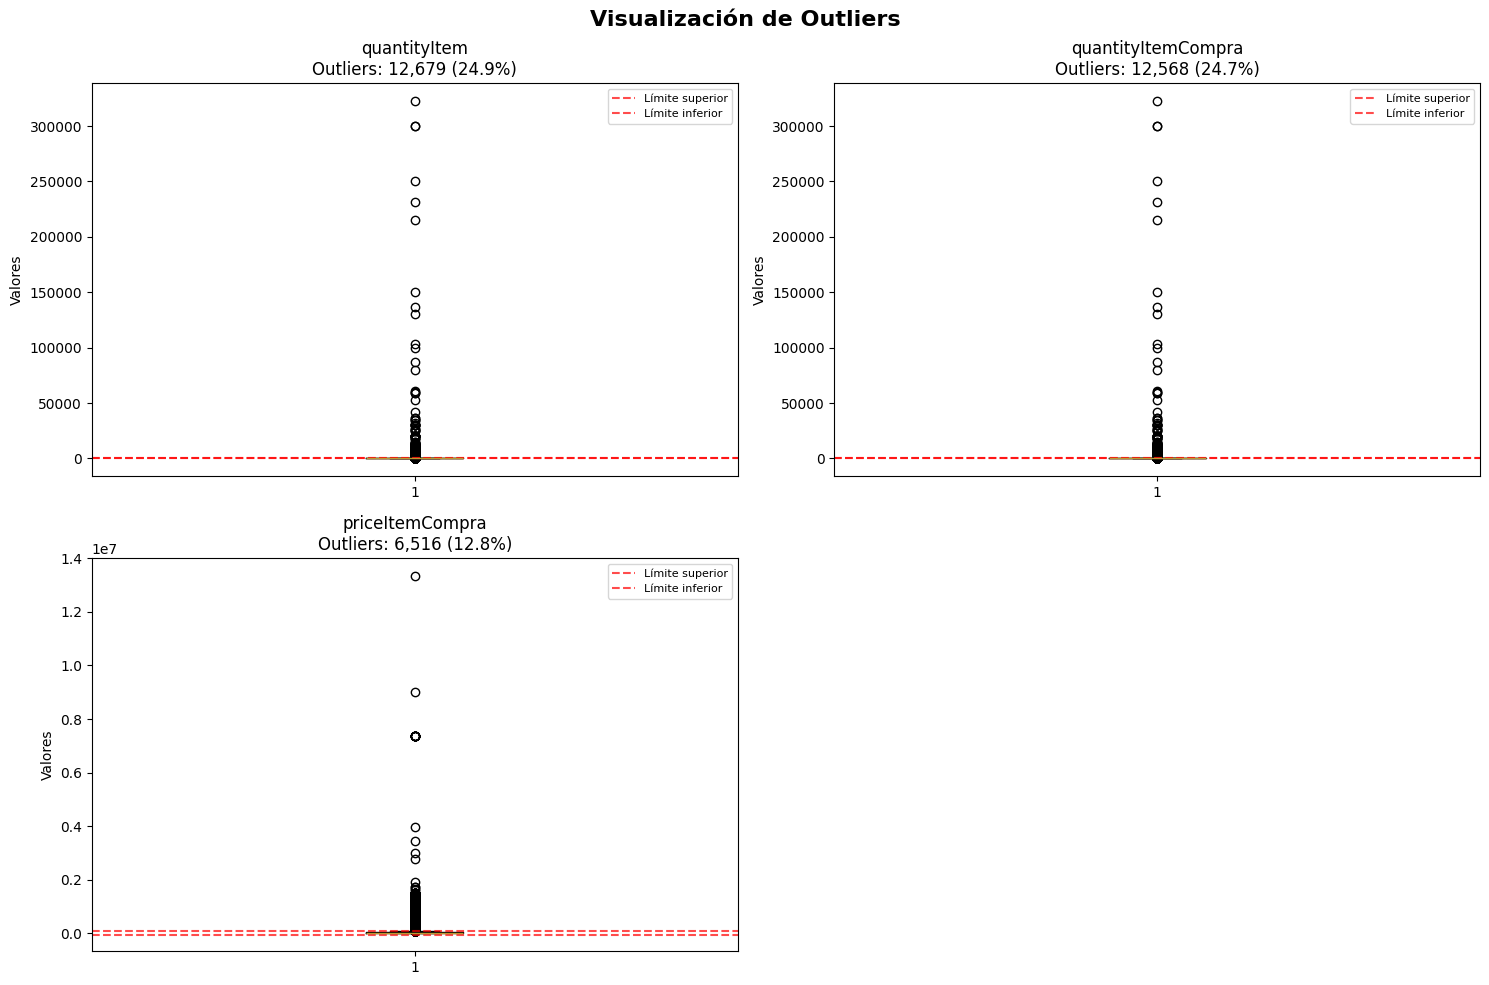


Análisis de outliers completado


In [85]:
def detect_outliers_iqr(column_data, column_name):
    """
    Detecta outliers usando el método del rango intercuartílico (IQR)
    """
    Q1 = column_data.quantile(0.25)
    Q3 = column_data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = column_data[(column_data < lower_bound) | (column_data > upper_bound)]
    
    return {
        'column': column_name,
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'lower_bound': lower_bound,
        'upper_bound': upper_bound,
        'outliers_count': len(outliers),
        'outliers_percentage': (len(outliers) / len(column_data)) * 100,
        'outliers_values': outliers.values if len(outliers) <= 10 else outliers.head(10).values
    }

print("ANÁLISIS DE OUTLIERS")
print("=" * 50)

numeric_columns = df.select_dtypes(include=[np.number]).columns
outlier_summary = []

if len(numeric_columns) > 0:
    for col in numeric_columns:
        data = df[col].dropna()
        if len(data) > 0:
            outlier_info = detect_outliers_iqr(data, col)
            outlier_summary.append(outlier_info)
            
            print(f"\n{col}:")
            print(f"   • Rango normal: [{outlier_info['lower_bound']:.2f}, {outlier_info['upper_bound']:.2f}]")
            print(f"   • Outliers detectados: {outlier_info['outliers_count']:,} ({outlier_info['outliers_percentage']:.2f}%)")
            
            if outlier_info['outliers_count'] > 0:
                print(f"   • Algunos valores atípicos: {outlier_info['outliers_values'][:5]}")
    
    # Resumen general
    total_outliers = sum(info['outliers_count'] for info in outlier_summary)
    print(f"\nRESUMEN DE OUTLIERS:")
    print("-" * 30)
    print(f"   • Total de outliers detectados: {total_outliers:,}")
    print(f"   • Variables con outliers: {sum(1 for info in outlier_summary if info['outliers_count'] > 0)}")
    
    # Variable con más outliers
    if outlier_summary:
        max_outliers = max(outlier_summary, key=lambda x: x['outliers_count'])
        print(f"   • Variable con más outliers: {max_outliers['column']} ({max_outliers['outliers_count']:,})")
else:
    print("No hay variables numéricas para analizar outliers")

#Visualización de outliers
if len(numeric_columns) > 0:
    # Seleccionar variables con outliers para visualizar
    vars_with_outliers = [info for info in outlier_summary if info['outliers_count'] > 0]
    
    if vars_with_outliers:
        n_vars = min(len(vars_with_outliers), 4)  # Máximo 4 variables
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        fig.suptitle('Visualización de Outliers', fontsize=16, fontweight='bold')
        axes = axes.flatten()
        
        for i, var_info in enumerate(vars_with_outliers[:n_vars]):
            col_name = var_info['column']
            data = df[col_name].dropna()
            
            # Boxplot
            axes[i].boxplot(data, vert=True)
            axes[i].set_title(f'{col_name}\nOutliers: {var_info["outliers_count"]:,} ({var_info["outliers_percentage"]:.1f}%)')
            axes[i].set_ylabel('Valores')
            
            # Agregar líneas de referencia
            axes[i].axhline(y=var_info['upper_bound'], color='red', linestyle='--', alpha=0.7, label='Límite superior')
            axes[i].axhline(y=var_info['lower_bound'], color='red', linestyle='--', alpha=0.7, label='Límite inferior')
            axes[i].legend(fontsize=8)
        
        # Ocultar subplots no usados
        for i in range(n_vars, 4):
            axes[i].set_visible(False)
        
        plt.tight_layout()
        plt.show()
    else:
        print("No se detectaron outliers significativos en las variables numéricas.")
else:
    print("No hay variables numéricas para visualizar outliers")

print(f"\nAnálisis de outliers completado")

## **FASE 5: VISUALIZACIONES EXPLORATORIAS**

Paso 5.1: Distribuciones de variables numéricas

Generando gráficos para 4 variables


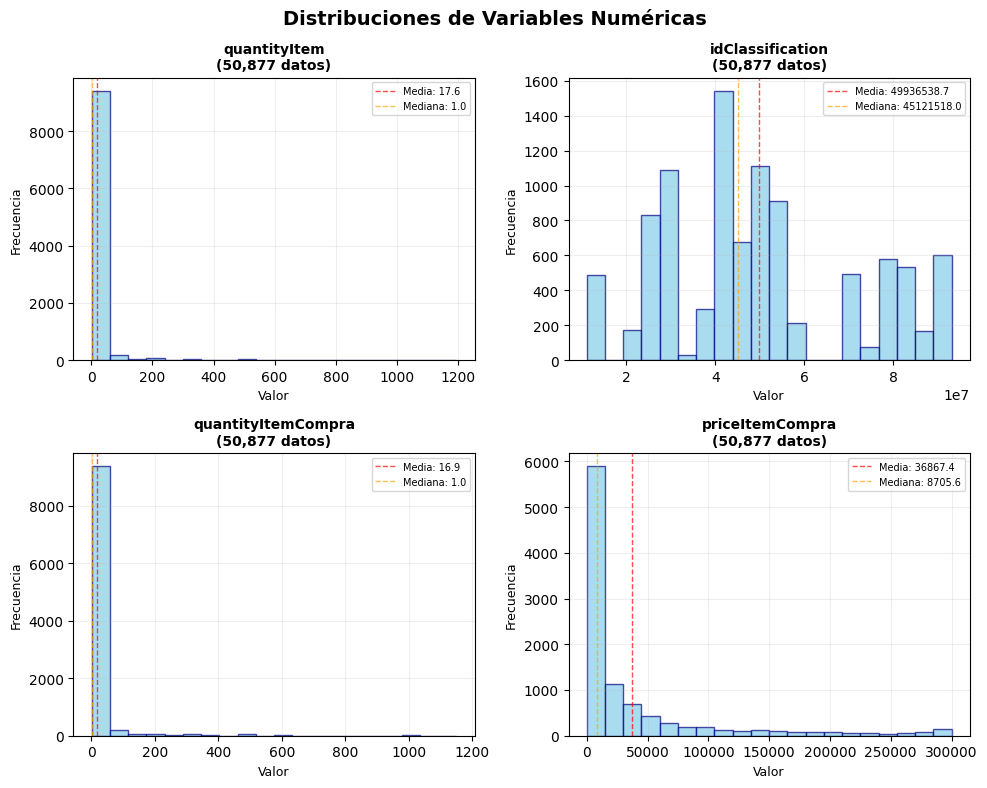


Análisis de distribuciones completado


In [90]:
numeric_columns = df.select_dtypes(include=[np.number]).columns

if len(numeric_columns) > 0:
    
    # Limitar a máximo 6 variables para visualización rápida
    viz_columns = numeric_columns[:6]
    if len(numeric_columns) > 6:
        print(f"Mostrando las primeras 6 de {len(numeric_columns)} variables para optimizar rendimiento")
    
    n_vars = len(viz_columns)
    
    if n_vars > 0:
        # Layout optimizado
        if n_vars <= 2:
            rows, cols = 1, 2
            figsize = (10, 5)
        elif n_vars <= 4:
            rows, cols = 2, 2  
            figsize = (10, 8)
        else:
            rows, cols = 2, 3
            figsize = (12, 8)
        
        print(f"Generando gráficos para {len(viz_columns)} variables")
        
        fig, axes = plt.subplots(rows, cols, figsize=figsize)
        fig.suptitle('Distribuciones de Variables Numéricas', fontsize=14, fontweight='bold')
        
        # Asegurar que axes sea siempre un array
        if n_vars == 1:
            axes = [axes]
        elif rows * cols > 1:
            axes = axes.flatten() if hasattr(axes, 'flatten') else [axes]
        
        # Procesar cada variable de forma optimizada
        for i, col in enumerate(viz_columns):
            ax = axes[i] if len(axes) > 1 else axes
            
            data = df[col].dropna()
            if len(data) > 0:
                # Usar muestra más pequeña para mayor velocidad
                if len(data) > 10000:
                    data_sample = data.sample(n=10000, random_state=42)
                
                else:
                    data_sample = data
                
                # Filtrar outliers para mejor visualización (método rápido)
                if len(data_sample) > 100:
                    q99 = data_sample.quantile(0.99)
                    q01 = data_sample.quantile(0.01)
                    data_viz = data_sample[(data_sample >= q01) & (data_sample <= q99)]
                else:
                    data_viz = data_sample
                
                # Crear histograma simple (sin KDE para mayor velocidad)
                try:
                    ax.hist(data_viz, bins=20, alpha=0.7, color='skyblue', edgecolor='navy')
                    
                    # Agregar solo estadísticas básicas
                    mean_val = data_viz.mean()
                    median_val = data_viz.median()
                    
                    # Líneas verticales simples
                    ax.axvline(mean_val, color='red', linestyle='--', alpha=0.7, 
                              linewidth=1, label=f'Media: {mean_val:.1f}')
                    ax.axvline(median_val, color='orange', linestyle='--', alpha=0.7, 
                              linewidth=1, label=f'Mediana: {median_val:.1f}')
                    
                    # Personalización mínima
                    ax.set_title(f'{col}\n({len(data):,} datos)', fontsize=10, fontweight='bold')
                    ax.set_xlabel('Valor', fontsize=9)
                    ax.set_ylabel('Frecuencia', fontsize=9)
                    ax.legend(fontsize=7)
                    ax.grid(True, alpha=0.2)
                    
                except Exception as e:
                    print(f"      ⚠️ Error graficando {col}: {str(e)[:50]}")
                    ax.text(0.5, 0.5, f'Error al\ngraficar {col}', ha='center', va='center', 
                           transform=ax.transAxes, fontsize=10)
            else:
                ax.text(0.5, 0.5, f'Sin datos\nen {col}', ha='center', va='center', 
                       transform=ax.transAxes, fontsize=10)
                ax.set_title(col, fontsize=10, fontweight='bold')
        
        # Ocultar subplots no usados
        for i in range(len(viz_columns), rows*cols):
            if i < len(axes):
                axes[i].set_visible(False)
        
        plt.tight_layout()
        plt.show()        
else:
    print("No se encontraron variables numéricas para graficar")

print(f"\nAnálisis de distribuciones completado")

Paso 5.2: Análisis de correlaciones

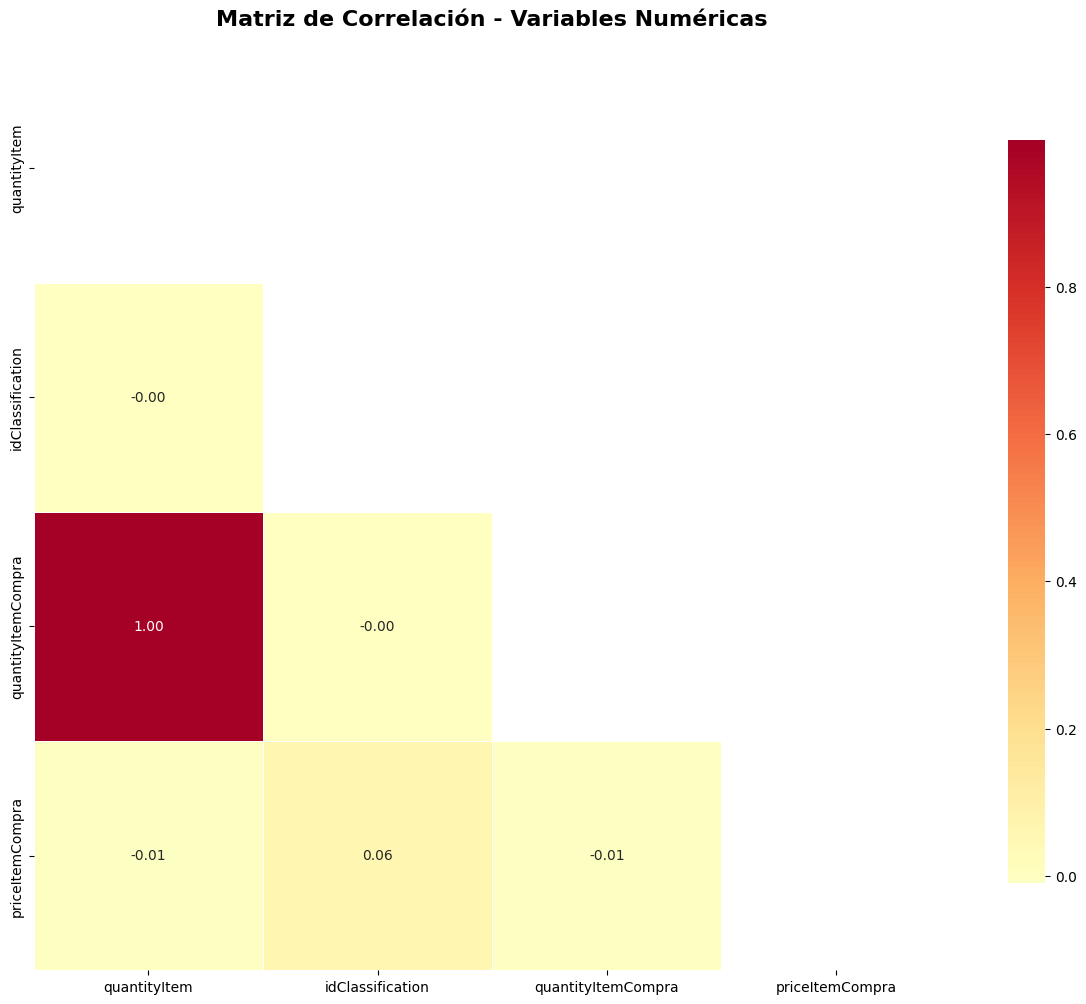


CORRELACIONES MÁS RELEVANTES:
---------------------------------------------
Top 6 correlaciones más fuertes:
    1. quantityItem         ↔ quantityItemCompra  :  0.999 MUY FUERTE Positiva
    2. idClassification     ↔ priceItemCompra     :  0.060 MUY DÉBIL Positiva
    3. quantityItemCompra   ↔ priceItemCompra     : -0.010 MUY DÉBIL Negativa
    4. quantityItem         ↔ priceItemCompra     : -0.010 MUY DÉBIL Negativa
    5. quantityItem         ↔ idClassification    : -0.004 MUY DÉBIL Negativa
    6. idClassification     ↔ quantityItemCompra  : -0.004 MUY DÉBIL Negativa


In [92]:
numeric_columns = df.select_dtypes(include=[np.number]).columns

if len(numeric_columns) >= 2:
    # Calcular matriz de correlación
    corr_matrix = df[numeric_columns].corr()
    
    # Visualización de matriz de correlación
    plt.figure(figsize=(12, 10))
    
    # Crear máscara para la matriz triangular superior
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    
    # Generar mapa de calor
    sns.heatmap(corr_matrix, 
                mask=mask,
                annot=True, 
                cmap='RdYlBu_r', 
                center=0,
                square=True, 
                fmt='.2f',
                cbar_kws={"shrink": .8},
                linewidths=0.5)
    
    plt.title('Matriz de Correlación - Variables Numéricas', 
              fontsize=16, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.show()
    
    # Encontrar correlaciones más fuertes
    print(f"\nCORRELACIONES MÁS RELEVANTES:")
    print("-" * 45)
    
    # Obtener pares de correlaciones (excluyendo diagonal)
    correlations = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            var1 = corr_matrix.columns[i]
            var2 = corr_matrix.columns[j]
            corr_value = corr_matrix.iloc[i, j]
            
            if not pd.isna(corr_value):
                correlations.append((var1, var2, corr_value))
    
    # Ordenar por valor absoluto de correlación
    correlations.sort(key=lambda x: abs(x[2]), reverse=True)
    
    # Mostrar top correlaciones
    top_n = min(10, len(correlations))
    if correlations:
        print(f"Top {top_n} correlaciones más fuertes:")
        for i, (var1, var2, corr) in enumerate(correlations[:top_n]):
            strength = ""
            if abs(corr) >= 0.8:
                strength = "MUY FUERTE"
            elif abs(corr) >= 0.6:
                strength = "FUERTE"
            elif abs(corr) >= 0.4:
                strength = "MODERADA"
            elif abs(corr) >= 0.2:
                strength = "DÉBIL"
            else:
                strength = "MUY DÉBIL"
            
            direction = "Positiva" if corr > 0 else "Negativa"
            print(f"   {i+1:2d}. {var1:<20} ↔ {var2:<20}: {corr:6.3f} {strength} {direction}")
        
        # Estadísticas de correlación
        strong_corr = len([c for c in correlations if abs(c[2]) >= 0.6])
        moderate_corr = len([c for c in correlations if 0.4 <= abs(c[2]) < 0.6])
        weak_corr = len([c for c in correlations if 0.2 <= abs(c[2]) < 0.4])
        
    else:
        print(" No se pudieron calcular correlaciones válidas")
    
else:
    print(f"Se necesitan al menos 2 variables numéricas para correlaciones (encontradas: {len(numeric_columns)})")
    if len(numeric_columns) > 0:
        print(f"Variables numéricas disponibles: {list(numeric_columns)}")

Paso 5.3: Variables categóricas - Frecuencias y distribuciones


Variable: descriptionItem
------------------------------
   • Valores únicos: 46,836
   • Valores nulos: 1 (0.0%)
   • Total registros: 50,877

   Top 15 valores más frecuentes:
       1. Ver Pliego                    :   2,479 (  4.9%)
       2. Ninguna                       :     147 (  0.3%)
       3. Toner                         :      33 (  0.1%)
       4. SILLA EJECUTIVA               :      31 (  0.1%)
       5. LIBRETAS, BOTES Y BOLSAS, p...:      30 (  0.1%)
       6. Bolsas de cemento Bijao.      :      23 (  0.0%)
       7. MICROONDAS                    :      19 (  0.0%)
       8. Ver especificación en plieg...:      15 (  0.0%)
       9. Se solicita cotización  par...:      13 (  0.0%)
      10. Licencia Microsoft Office     :      13 (  0.0%)
      11. SILLA SEMI EJECUTIVA          :      12 (  0.0%)
      12. REVISAR PLIEGO DE CONDICIONES :      12 (  0.0%)
      13. VER BASES DE LICITACION       :      12 (  0.0%)
      14. Solicitar invitación a coti...:      12 (  0

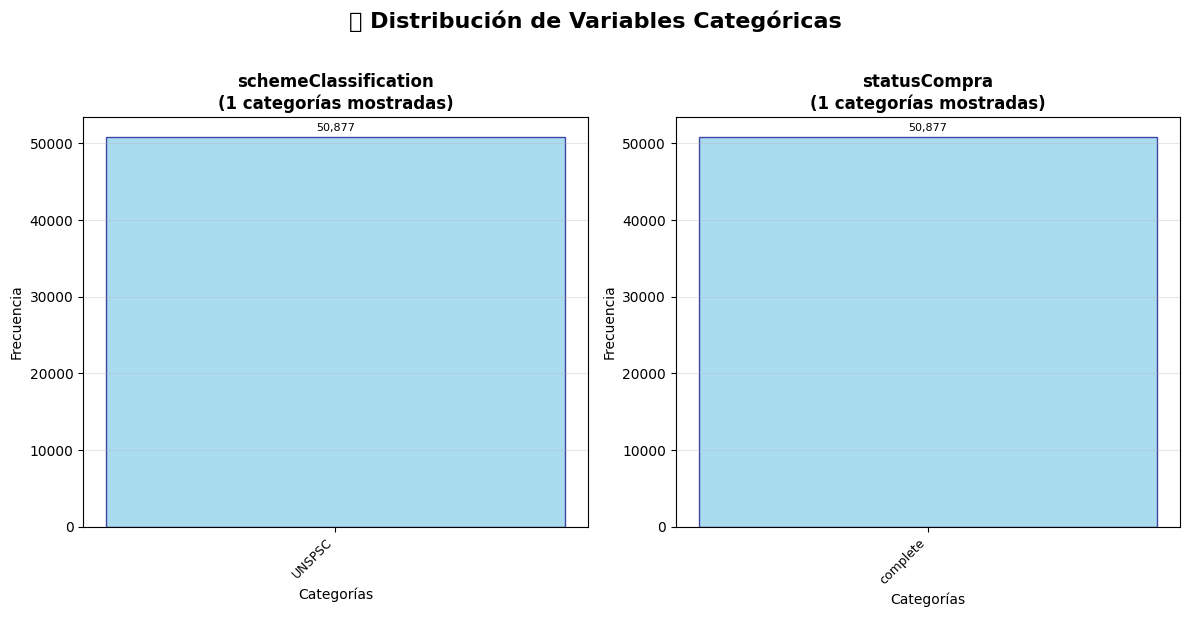

In [95]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

if len(categorical_columns) > 0:
    # Análisis de cada variable categórica
    for col in categorical_columns:
        print(f"\nVariable: {col}")
        print("-" * 30)
        
        # Contar valores únicos y frecuencias
        value_counts = df[col].value_counts(dropna=False)
        null_count = df[col].isnull().sum()
        unique_count = df[col].nunique()
        
        print(f"   • Valores únicos: {unique_count:,}")
        print(f"   • Valores nulos: {null_count:,} ({null_count/len(df)*100:.1f}%)")
        print(f"   • Total registros: {len(df):,}")
        
        # Mostrar top valores si no son demasiados
        if unique_count <= 20:
            print(f"\n   Distribución completa:")
            for i, (value, count) in enumerate(value_counts.head(20).items()):
                pct = count / len(df) * 100
                # Manejo de valores nulos
                display_value = " VALOR NULO" if pd.isna(value) else str(value)
                if len(display_value) > 30:
                    display_value = display_value[:27] + "..."
                print(f"      {i+1:2d}. {display_value:<30}: {count:7,} ({pct:5.1f}%)")
        else:
            print(f"\n   Top 15 valores más frecuentes:")
            for i, (value, count) in enumerate(value_counts.head(15).items()):
                pct = count / len(df) * 100
                display_value = "VALOR NULO" if pd.isna(value) else str(value)
                if len(display_value) > 30:
                    display_value = display_value[:27] + "..."
                print(f"      {i+1:2d}. {display_value:<30}: {count:7,} ({pct:5.1f}%)")
            
            if unique_count > 15:
                print(f"      ... y {unique_count-15:,} valores más")
        
        
    # Visualización de variables categóricas (máximo 3)
    viz_columns = [col for col in categorical_columns if df[col].nunique() <= 20][:3]
    
    if viz_columns:
        print(f"\nVISUALIZACIÓN DE VARIABLES CATEGÓRICAS")
        print("=" * 50)
        
        # Configurar subplots
        n_plots = len(viz_columns)
        if n_plots == 1:
            fig, axes = plt.subplots(1, 1, figsize=(10, 6))
            axes = [axes]
        else:
            fig, axes = plt.subplots(1, n_plots, figsize=(6*n_plots, 6))
        
        fig.suptitle('📊 Distribución de Variables Categóricas', 
                     fontsize=16, fontweight='bold', y=1.02)
        
        for i, col in enumerate(viz_columns):
            ax = axes[i]
            
            # Obtener datos para graficar
            value_counts = df[col].value_counts().head(15)  # Top 15 para evitar sobrecarga
            
            # Crear gráfico de barras
            bars = ax.bar(range(len(value_counts)), value_counts.values, 
                         color='skyblue', alpha=0.7, edgecolor='navy')
            
            # Personalizar gráfico
            ax.set_title(f'{col}\n({len(value_counts)} categorías mostradas)', 
                        fontsize=12, fontweight='bold')
            ax.set_xlabel('Categorías', fontsize=10)
            ax.set_ylabel('Frecuencia', fontsize=10)
            
            # Etiquetas del eje X
            labels = [str(label)[:15] + "..." if len(str(label)) > 15 else str(label) 
                     for label in value_counts.index]
            ax.set_xticks(range(len(value_counts)))
            ax.set_xticklabels(labels, rotation=45, ha='right', fontsize=9)
            
            # Añadir valores en las barras
            for bar, value in zip(bars, value_counts.values):
                height = bar.get_height()
                ax.text(bar.get_x() + bar.get_width()/2., height + max(value_counts.values)*0.01,
                       f'{value:,}', ha='center', va='bottom', fontsize=8)
            
            ax.grid(True, alpha=0.3, axis='y')
        
        plt.tight_layout()
        plt.show()
        
          
    else:
        print("\n Variables categóricas tienen demasiados valores únicos para visualizar eficientemente")
    
else:
    print(" No se encontraron variables categóricas para analizar")

## 🔍 **FASE 6: ANÁLISIS EXPLORATORIO ESPECIALIZADO**

Paso 6.1: Análisis temporal (si hay columnas de fecha)

Columnas temporales detectadas: ['startDateTender', 'endDateTender', 'endDateEnquiry', 'startDateEnquiry', 'dateCompra']

Analizando columna temporal: startDateTender
-----------------------------------
   Columna convertida a datetime
    Fecha mínima: 2023-03-04 13:10:00-06:00
    Fecha máxima: 2025-01-15 17:08:00-06:00
    Rango temporal: 683 días (1.9 años)
    Registros con fecha: 50,877
    Registros sin fecha: 0

    Distribución por año:
      2023: 47 registros (0.1%)
      2024: 50,821 registros (99.9%)
      2025: 9 registros (0.0%)


<Figure size 1200x600 with 0 Axes>

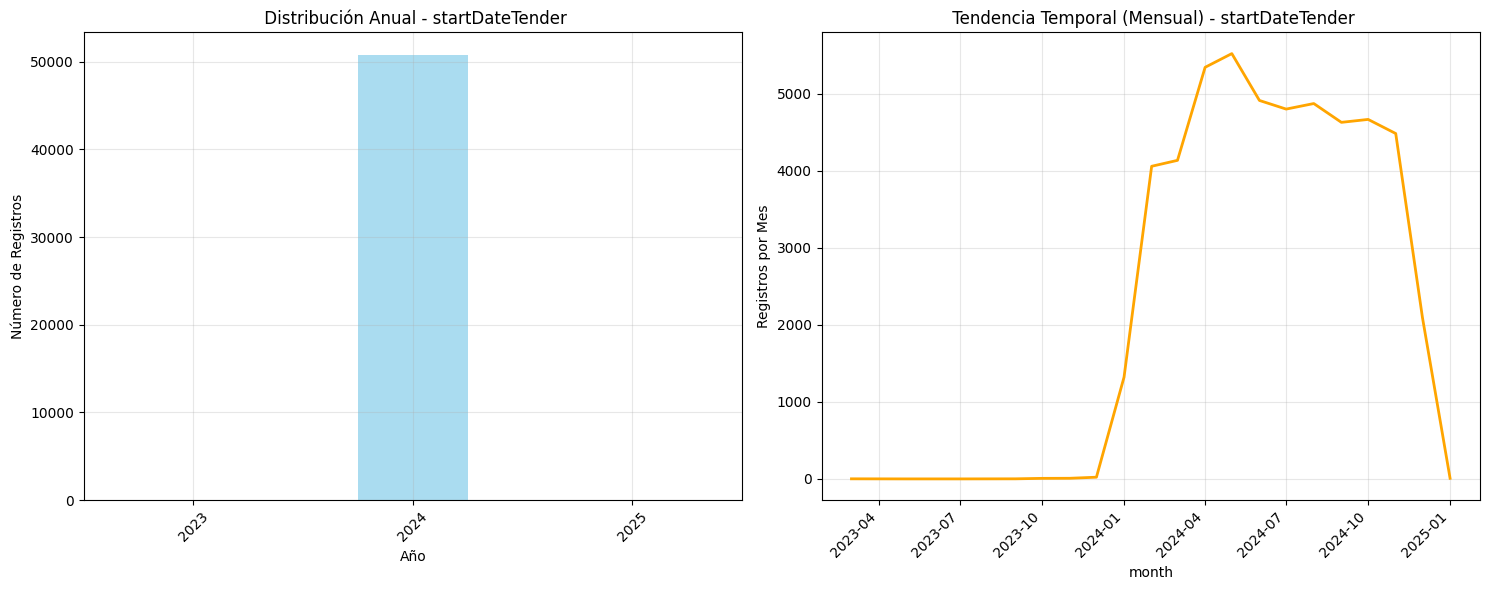


   Patrones detectados:
      • Día más activo: Tuesday (21.8%)
      • Mes más activo: May (10.8%)

Analizando columna temporal: endDateTender
-----------------------------------
   Columna convertida a datetime
    Fecha mínima: 2023-03-30 12:00:00-06:00
    Fecha máxima: 2025-03-05 10:00:00-06:00
    Rango temporal: 705 días (1.9 años)
    Registros con fecha: 50,877
    Registros sin fecha: 0

    Distribución por año:
      2023: 42 registros (0.1%)
      2024: 50,716 registros (99.7%)
      2025: 119 registros (0.2%)


<Figure size 1200x600 with 0 Axes>

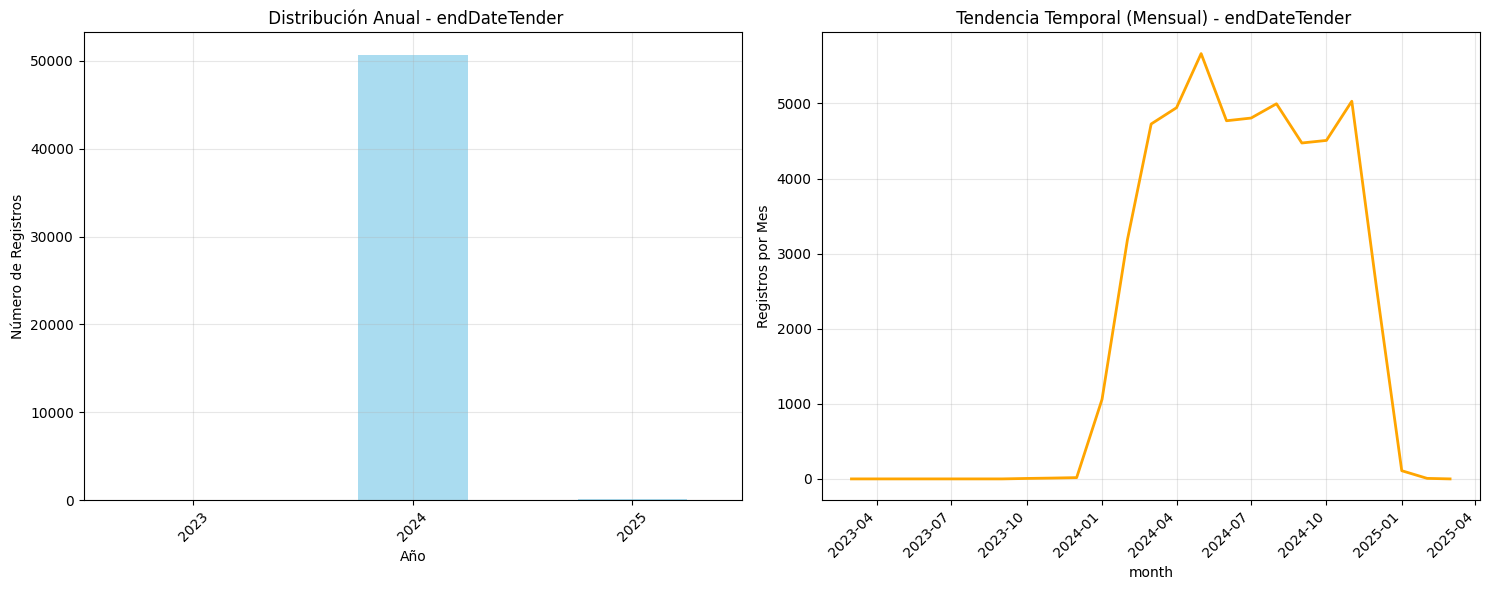


   Patrones detectados:
      • Día más activo: Friday (22.0%)
      • Mes más activo: May (11.1%)

Analizando columna temporal: endDateEnquiry
-----------------------------------
   Columna convertida a datetime
    Fecha mínima: 2023-03-30 12:00:00-06:00
    Fecha máxima: 2025-03-05 10:00:00-06:00
    Rango temporal: 705 días (1.9 años)
    Registros con fecha: 50,877
    Registros sin fecha: 0

    Distribución por año:
      2023: 42 registros (0.1%)
      2024: 50,716 registros (99.7%)
      2025: 119 registros (0.2%)


<Figure size 1200x600 with 0 Axes>

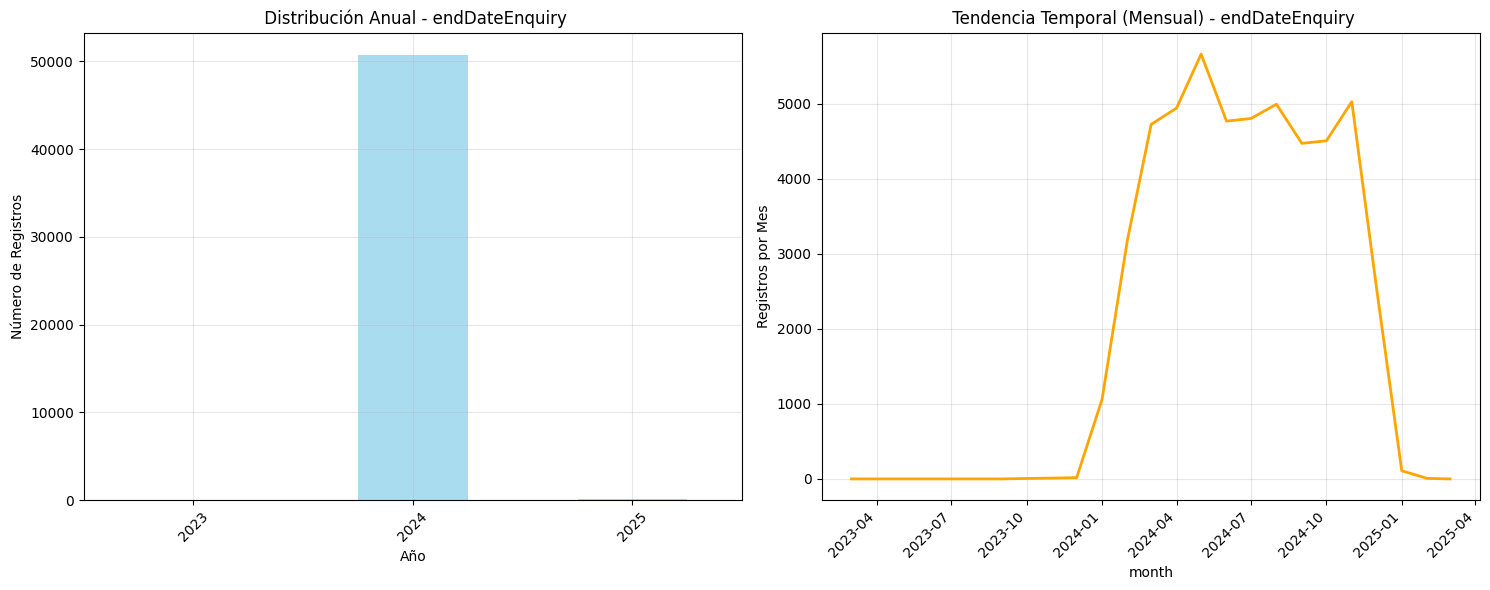


   Patrones detectados:
      • Día más activo: Friday (22.0%)
      • Mes más activo: May (11.1%)

Analizando columna temporal: startDateEnquiry
-----------------------------------
   Columna convertida a datetime
    Fecha mínima: 2023-03-04 13:10:00-06:00
    Fecha máxima: 2025-01-15 17:08:00-06:00
    Rango temporal: 683 días (1.9 años)
    Registros con fecha: 50,877
    Registros sin fecha: 0

    Distribución por año:
      2023: 47 registros (0.1%)
      2024: 50,821 registros (99.9%)
      2025: 9 registros (0.0%)


<Figure size 1200x600 with 0 Axes>

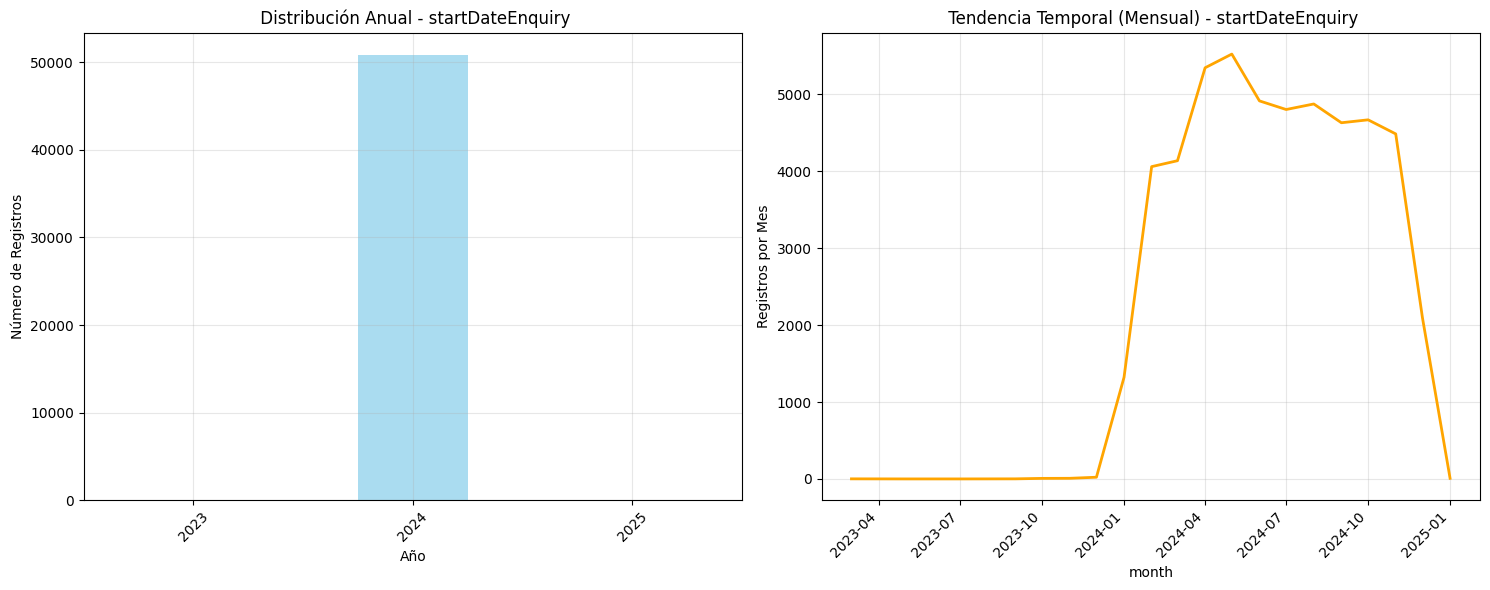


   Patrones detectados:
      • Día más activo: Tuesday (21.8%)
      • Mes más activo: May (10.8%)

Analizando columna temporal: dateCompra
-----------------------------------
   Columna convertida a datetime
    Fecha mínima: 2024-01-02 08:55:14.337000-06:00
    Fecha máxima: 2024-12-31 13:26:33.477000-06:00
    Rango temporal: 364 días (1.0 años)
    Registros con fecha: 50,676
    Registros sin fecha: 201

    Distribución por año:
      2024: 50,676 registros (100.0%)


<Figure size 1200x600 with 0 Axes>

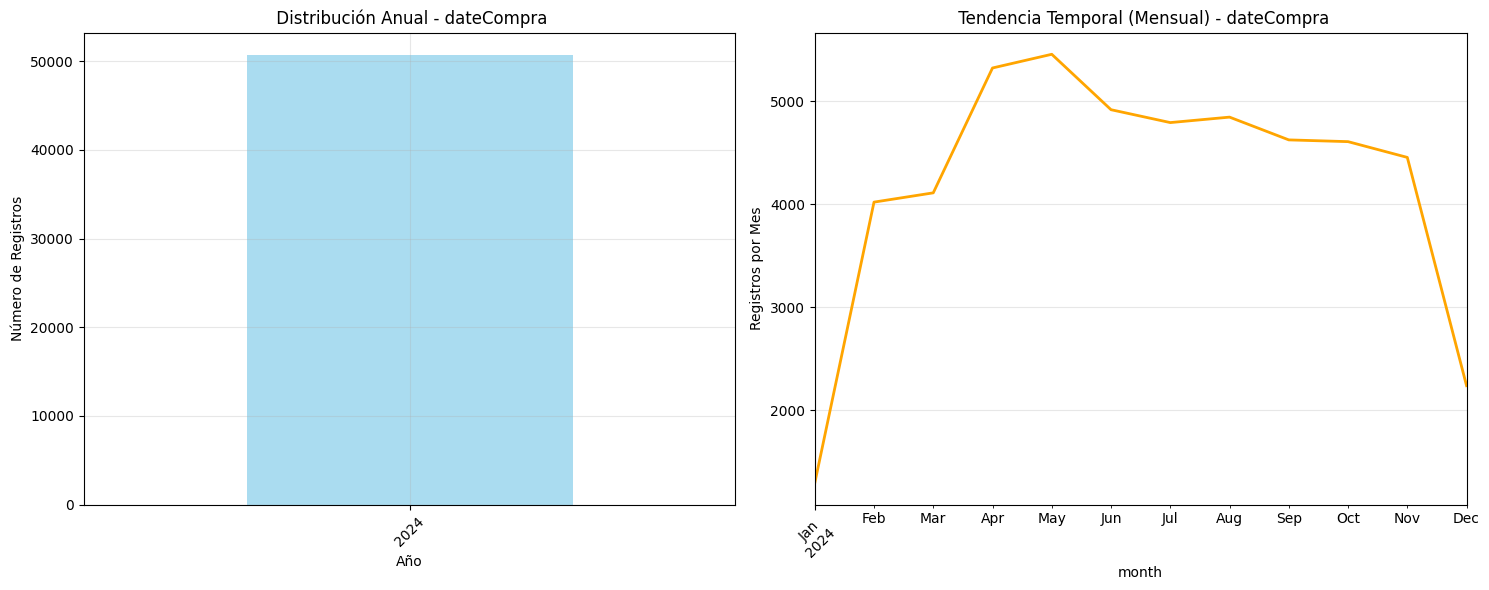


   Patrones detectados:
      • Día más activo: Tuesday (22.0%)
      • Mes más activo: May (10.8%)

 Análisis temporal completado


In [97]:
# Buscar columnas de fecha/tiempo
date_columns = []
for col in df.columns:
    if df[col].dtype == 'datetime64[ns]' or 'date' in col.lower() or 'time' in col.lower():
        date_columns.append(col)
    # Intentar convertir columnas que podrían ser fechas
    elif df[col].dtype == 'object':
        try:
            # Verificar si es una fecha en formato string
            sample = df[col].dropna().head(100)
            if len(sample) > 0:
                test_conversion = pd.to_datetime(sample.iloc[0], errors='coerce')
                if pd.notna(test_conversion):
                    # Verificar si más del 80% se puede convertir
                    converted = pd.to_datetime(sample, errors='coerce')
                    if converted.notna().sum() / len(sample) > 0.8:
                        date_columns.append(col)
        except:
            pass

if date_columns:
    print(f"Columnas temporales detectadas: {date_columns}")
    
    # Analizar cada columna temporal
    for col in date_columns:
        print(f"\nAnalizando columna temporal: {col}")
        print("-" * 35)
        
        # Convertir a datetime si no lo está
        if df[col].dtype != 'datetime64[ns]':
            try:
                df[col] = pd.to_datetime(df[col], errors='coerce')
                print("   Columna convertida a datetime")
            except:
                print("   Error al convertir a datetime")
                continue
        
        # Estadísticas temporales
        date_series = df[col].dropna()
        if len(date_series) > 0:
            min_date = date_series.min()
            max_date = date_series.max()
            date_range = max_date - min_date
            
            print(f"    Fecha mínima: {min_date}")
            print(f"    Fecha máxima: {max_date}")
            print(f"    Rango temporal: {date_range.days} días ({date_range.days/365.25:.1f} años)")
            print(f"    Registros con fecha: {len(date_series):,}")
            print(f"    Registros sin fecha: {df[col].isnull().sum():,}")
            
            # Análisis de distribución temporal
            if len(date_series) > 100:  # Solo si hay suficientes datos
                # Agrupar por año
                df_temp = date_series.to_frame()
                df_temp['year'] = df_temp[col].dt.year
                yearly_counts = df_temp['year'].value_counts().sort_index()
                
                print(f"\n    Distribución por año:")
                for year, count in yearly_counts.items():
                    pct = count / len(date_series) * 100
                    print(f"      {year}: {count:,} registros ({pct:.1f}%)")
                
                # Visualización temporal
                plt.figure(figsize=(12, 6))
                
                # Crear dos subplots
                fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
                
                # Gráfico 1: Distribución por año
                yearly_counts.plot(kind='bar', ax=ax1, color='skyblue', alpha=0.7)
                ax1.set_title(f' Distribución Anual - {col}')
                ax1.set_xlabel('Año')
                ax1.set_ylabel('Número de Registros')
                ax1.tick_params(axis='x', rotation=45)
                ax1.grid(True, alpha=0.3)
                
                # Gráfico 2: Línea temporal (muestra)
                if len(date_series) > 1000:
                    # Para datasets grandes, agrupar por mes
                    df_temp['month'] = df_temp[col].dt.to_period('M')
                    monthly_counts = df_temp['month'].value_counts().sort_index()
                    monthly_counts.index = monthly_counts.index.to_timestamp()
                    monthly_counts.plot(ax=ax2, color='orange', linewidth=2)
                    ax2.set_title(f' Tendencia Temporal (Mensual) - {col}')
                    ax2.set_ylabel('Registros por Mes')
                else:
                    # Para datasets pequeños, mostrar datos diarios
                    daily_counts = date_series.value_counts().sort_index()
                    daily_counts.plot(ax=ax2, color='green', alpha=0.7)
                    ax2.set_title(f' Distribución Diaria - {col}')
                    ax2.set_ylabel('Registros por Día')
                
                ax2.tick_params(axis='x', rotation=45)
                ax2.grid(True, alpha=0.3)
                
                plt.tight_layout()
                plt.show()
                
                # Análisis de patrones semanales/mensuales
                if len(date_series) > 365:
                    df_temp['weekday'] = df_temp[col].dt.day_name()
                    df_temp['month'] = df_temp[col].dt.month_name()
                    
                    weekday_counts = df_temp['weekday'].value_counts()
                    month_counts = df_temp['month'].value_counts()
                    
                    print(f"\n   Patrones detectados:")
                    
                    # Día de la semana más frecuente
                    most_common_day = weekday_counts.index[0]
                    day_pct = weekday_counts.iloc[0] / len(date_series) * 100
                    print(f"      • Día más activo: {most_common_day} ({day_pct:.1f}%)")
                    
                    # Mes más frecuente
                    most_common_month = month_counts.index[0]
                    month_pct = month_counts.iloc[0] / len(date_series) * 100
                    print(f"      • Mes más activo: {most_common_month} ({month_pct:.1f}%)")
        else:
            print("    No hay datos temporales válidos en esta columna")

else:
    print(" No se detectaron columnas temporales en el dataset")

print(f"\n Análisis temporal completado")

Paso 6.2: Análisis de segmentación y clustering básico

Variables numéricas seleccionadas: ['quantityItem', 'idClassification', 'quantityItemCompra', 'priceItemCompra']

 Determinando número óptimo de clusters...
Aplicando K-Means con k=2

ANÁLISIS DE CLUSTERS (k=2):
----------------------------------------

   CLUSTER 0:
      • Tamaño: 19,991 registros (100.0%)
      • quantityItem: 72.23  (-54.1% vs promedio)
      • quantityItemCompra: 71.09  (-54.5% vs promedio)

   CLUSTER 1:
      • Tamaño: 9 registros (0.0%)
      • quantityItem: 189035.00  (+120100.4% vs promedio)
      • quantityItemCompra: 189035.00  (+120978.7% vs promedio)
      • priceItemCompra: 6.26  (-100.0% vs promedio)

 PCA aplicado - Varianza explicada:
   • PC1: 50.0%
   • PC2: 26.5%
   • Total: 76.5%
Aplicando K-Means con k=2

ANÁLISIS DE CLUSTERS (k=2):
----------------------------------------

   CLUSTER 0:
      • Tamaño: 19,991 registros (100.0%)
      • quantityItem: 72.23  (-54.1% vs promedio)
      • quantityItemCompra: 71.09  (-54.5% vs promedio)

   CLUSTER 1

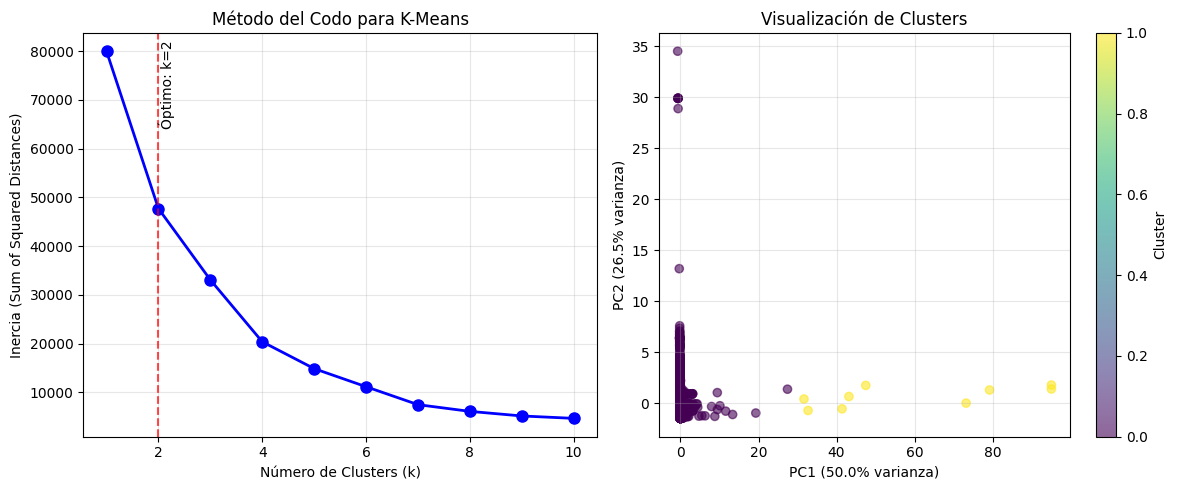


 Análisis de segmentación completado
   Se identificaron 2 grupos naturales en los datos


In [99]:
# Seleccionar variables numéricas para clustering
numeric_cols = df.select_dtypes(include=[np.number]).columns
numeric_cols = [col for col in numeric_cols if df[col].notna().sum() > len(df)*0.5]  # Al menos 50% datos

if len(numeric_cols) >= 2:
    print(f"Variables numéricas seleccionadas: {list(numeric_cols)}")
    
    # Preparar datos para clustering
    from sklearn.preprocessing import StandardScaler
    from sklearn.cluster import KMeans
    from sklearn.decomposition import PCA
    
    # Tomar muestra si el dataset es muy grande
    sample_size = min(20000, len(df))
    if len(df) > sample_size:
        df_sample = df.sample(n=sample_size, random_state=42)
        
    else:
        df_sample = df.copy()

    
    # Preparar matriz de datos
    X = df_sample[numeric_cols].fillna(df_sample[numeric_cols].median())
    
    # Estandarizar datos
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Determinar número óptimo de clusters usando método del codo
    print("\n Determinando número óptimo de clusters...")
    inertias = []
    K_range = range(1, min(11, len(df_sample)//100 + 2))  # Hasta 10 clusters o según tamaño
    
    for k in K_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(X_scaled)
        inertias.append(kmeans.inertia_)
    
    # Visualizar método del codo
    plt.figure(figsize=(12, 5))
    
    # Subplot 1: Método del codo
    plt.subplot(1, 2, 1)
    plt.plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
    plt.xlabel('Número de Clusters (k)')
    plt.ylabel('Inercia (Sum of Squared Distances)')
    plt.title('Método del Codo para K-Means')
    plt.grid(True, alpha=0.3)
    
    # Encontrar el codo automáticamente
    if len(inertias) > 2:
        # Calcular segunda derivada para encontrar el codo
        second_deriv = []
        for i in range(1, len(inertias)-1):
            second_deriv.append(inertias[i-1] - 2*inertias[i] + inertias[i+1])
        
        if second_deriv:
            optimal_k = second_deriv.index(max(second_deriv)) + 2
            plt.axvline(x=optimal_k, color='red', linestyle='--', alpha=0.7)
            plt.text(optimal_k, max(inertias)*0.8, f'Óptimo: k={optimal_k}', 
                    rotation=90, verticalalignment='bottom')
        else:
            optimal_k = 3  # Por defecto
    else:
        optimal_k = 3
    
    # Realizar clustering con k óptimo
    print(f"Aplicando K-Means con k={optimal_k}")
    kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
    clusters = kmeans_final.fit_predict(X_scaled)
    
    # Añadir clusters al dataframe de muestra
    df_sample_copy = df_sample.copy()
    df_sample_copy['Cluster'] = clusters
    
    # Análisis de clusters
    print(f"\nANÁLISIS DE CLUSTERS (k={optimal_k}):")
    print("-" * 40)
    
    cluster_summary = df_sample_copy.groupby('Cluster')[numeric_cols].agg(['count', 'mean', 'std'])
    
    for cluster_id in range(optimal_k):
        cluster_data = df_sample_copy[df_sample_copy['Cluster'] == cluster_id]
        cluster_size = len(cluster_data)
        cluster_pct = cluster_size / len(df_sample_copy) * 100
        
        print(f"\n   CLUSTER {cluster_id}:")
        print(f"      • Tamaño: {cluster_size:,} registros ({cluster_pct:.1f}%)")
        
        # Características principales del cluster
        for col in numeric_cols:
            mean_val = cluster_data[col].mean()
            overall_mean = df_sample_copy[col].mean()
            diff_pct = ((mean_val - overall_mean) / overall_mean * 100) if overall_mean != 0 else 0
            
            if abs(diff_pct) > 20:  # Solo mostrar diferencias significativas
                direction = "" if diff_pct > 0 else ""
                print(f"      • {col}: {mean_val:.2f} {direction} ({diff_pct:+.1f}% vs promedio)")
    
    # Visualización de clusters (PCA si hay más de 2 variables)
    plt.subplot(1, 2, 2)
    
    if len(numeric_cols) == 2:
        # Si solo hay 2 variables, graficar directamente
        scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis', alpha=0.6)
        plt.xlabel(f'{numeric_cols[0]} (estandarizado)')
        plt.ylabel(f'{numeric_cols[1]} (estandarizado)')
    else:
        # Si hay más de 2 variables, usar PCA para reducir a 2D
        pca = PCA(n_components=2)
        X_pca = pca.fit_transform(X_scaled)
        
        scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.6)
        plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} varianza)')
        plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} varianza)')
        
        print(f"\n PCA aplicado - Varianza explicada:")
        print(f"   • PC1: {pca.explained_variance_ratio_[0]:.1%}")
        print(f"   • PC2: {pca.explained_variance_ratio_[1]:.1%}")
        print(f"   • Total: {sum(pca.explained_variance_ratio_):.1%}")
    
    plt.title('Visualización de Clusters')
    plt.colorbar(scatter, label='Cluster')
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print(f"\n Análisis de segmentación completado")
    print(f"   Se identificaron {optimal_k} grupos naturales en los datos")
    
else:
    print(" Se necesitan al menos 2 variables numéricas con datos suficientes")

## 🛍️ **FASE 7: ANÁLISIS DE PRODUCTOS**

Esta fase se centra específicamente en el análisis de los productos más demandados, identificando patrones de consumo, concentración de demanda y productos estratégicos en las compras gubernamentales.

### Paso 7.1: Análisis de productos más demandados

🚀 Iniciando análisis de productos (versión optimizada)...
📊 Calculando métricas de productos...
✅ Análisis completado. Top 10 de 5360 productos únicos


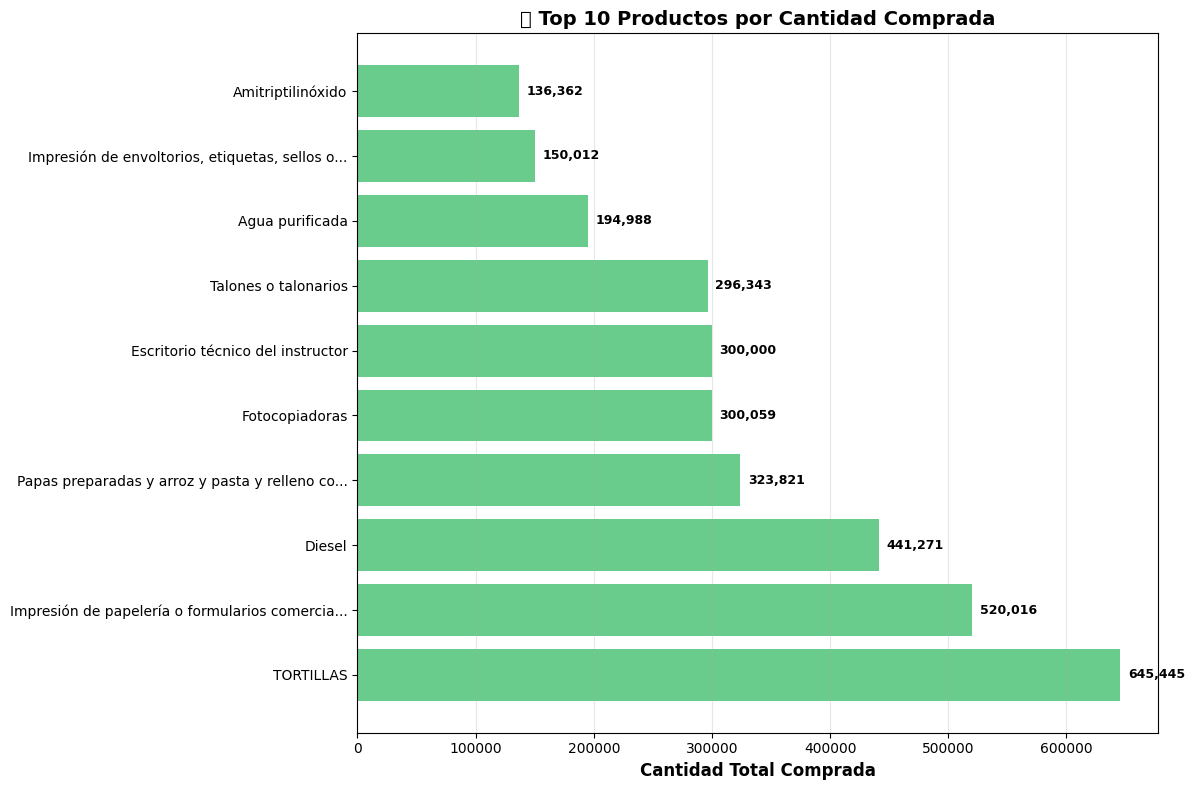


📊 TOP 5 PRODUCTOS MÁS DEMANDADOS:
#   Producto                            Cantidad        Órdenes   
-----------------------------------------------------------------
4802 TORTILLAS                                645,445       14
2554 Impresión de papelería o formular..      520,016      212
1775 Diesel                                   441,271      177
3405 Papas preparadas y arroz y pasta ..      323,821      252
2266 Fotocopiadoras                           300,059       39

💡 INSIGHTS CLAVE:
   • Top 10 productos: 53.1% del volumen total
   • Producto líder: TORTILLAS...
   • Diversidad: 5,360 productos únicos
   • Datos guardados en variable 'top_products_analysis'
⚡ Análisis completado en tiempo optimizado!


In [112]:
# 🛍️ Análisis OPTIMIZADO de productos más demandados
print("🚀 Iniciando análisis de productos (versión optimizada)...")

if 'descriptionClassification' in df.columns and 'quantityItemCompra' in df.columns:
    # ⚡ OPTIMIZACIÓN 1: Usar sample si el dataset es muy grande
    df_sample = df.sample(n=min(50000, len(df)), random_state=42) if len(df) > 50000 else df
    
    # ⚡ OPTIMIZACIÓN 2: Groupby más eficiente con menos operaciones
    print("📊 Calculando métricas de productos...")
    product_metrics = df_sample.groupby("descriptionClassification", as_index=False).agg({
        'quantityItemCompra': 'sum',
        'idTender': 'count'  # Más rápido que count en quantity
    }).rename(columns={
        'quantityItemCompra': 'total_quantity',
        'idTender': 'num_orders'
    })
    
    # Ordenar y tomar top 10
    top_products = product_metrics.nlargest(10, 'total_quantity')
    
    print(f"✅ Análisis completado. Top 10 de {len(product_metrics)} productos únicos")
    
    # ⚡ VISUALIZACIÓN SIMPLIFICADA pero efectiva
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    
    # Gráfico de barras simple y rápido
    y_pos = range(len(top_products))
    bars = ax.barh(y_pos, top_products['total_quantity'], 
                   color=plt.cm.viridis(0.7), alpha=0.8)
    
    # Configuración básica del gráfico
    ax.set_yticks(y_pos)
    ax.set_yticklabels([prod[:45] + '...' if len(prod) > 45 else prod 
                        for prod in top_products['descriptionClassification']], fontsize=10)
    ax.set_xlabel('Cantidad Total Comprada', fontsize=12, fontweight='bold')
    ax.set_title('🔝 Top 10 Productos por Cantidad Comprada', fontsize=14, fontweight='bold')
    ax.grid(axis='x', alpha=0.3)
    
    # Añadir solo las etiquetas más importantes (valores altos)
    max_value = top_products['total_quantity'].max()
    for i, value in enumerate(top_products['total_quantity']):
        if value > max_value * 0.1:  # Solo mostrar si es > 10% del máximo
            ax.text(value + max_value * 0.01, i, f'{value:,.0f}', 
                   va='center', fontweight='bold', fontsize=9)
    
    plt.tight_layout()
    plt.show()
    
    # ⚡ TABLA RESUMEN OPTIMIZADA
    print("\n📊 TOP 5 PRODUCTOS MÁS DEMANDADOS:")
    print("=" * 65)
    print(f"{'#':<3} {'Producto':<35} {'Cantidad':<15} {'Órdenes':<10}")
    print("-" * 65)
    
    for idx, row in top_products.head(5).iterrows():
        product_name = row['descriptionClassification']
        product_short = product_name[:33] + ".." if len(product_name) > 35 else product_name
        print(f"{idx+1:<3} {product_short:<35} {row['total_quantity']:>12,.0f} {row['num_orders']:>8,.0f}")
    
    # ⚡ INSIGHTS RÁPIDOS
    total_top10 = top_products['total_quantity'].sum()
    total_all = df_sample['quantityItemCompra'].sum()
    concentration = (total_top10 / total_all) * 100
    
    print(f"\n💡 INSIGHTS CLAVE:")
    print(f"   • Top 10 productos: {concentration:.1f}% del volumen total")
    print(f"   • Producto líder: {top_products.iloc[0]['descriptionClassification'][:50]}...")
    print(f"   • Diversidad: {len(product_metrics):,} productos únicos")
    
    # Guardar para uso posterior (opcional)
    globals()['top_products_analysis'] = top_products
    print(f"   • Datos guardados en variable 'top_products_analysis'")

else:
    print("❌ No se encontraron las columnas necesarias para análisis de productos")

print("⚡ Análisis completado en tiempo optimizado!")

### Paso 7.2: Análisis de compradores principales

Iniciando análisis de compradores principales...
Columnas detectadas:
  - Compradores: nameUnidadBuyer
  - Cantidades: quantityItem

Analizando 50,877 registros de compras válidos...
Compradores únicos encontrados: 328


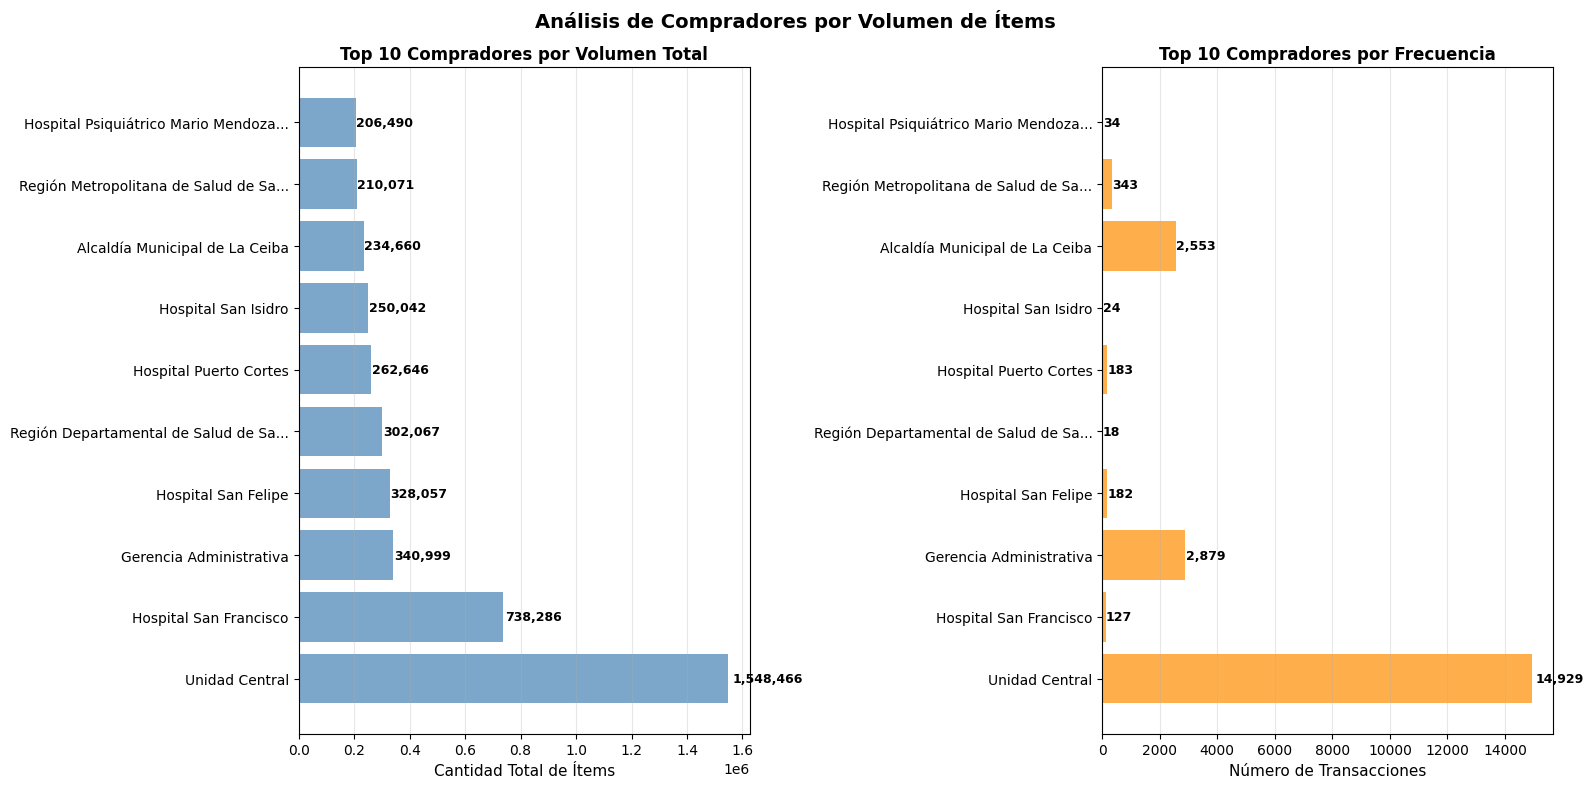


Top 5 Compradores por Volumen:
#   Comprador                                Cantidad Total  Transacciones   Promedio/Trans 
-------------------------------------------------------------------------------------
1   Unidad Central                              1,548,466        14,929         103.7
2   Hospital San Francisco                        738,286           127       5,813.3
3   Gerencia Administrativa                       340,999         2,879         118.4
4   Hospital San Felipe                           328,057           182       1,802.5
5   Región Departamental de Salud de Santa..      302,067            18      16,781.5

Concentración del Mercado por Volumen:
---------------------------------------------
  • Top 5 compradores: 51.7% del volumen total
  • Top 10 compradores: 70.1% del volumen total
  • Total compradores únicos: 328
  • Volumen total del mercado: 6,303,614 ítems
  • Tipo de mercado: Mercado concentrado

Estadísticas del Mercado:
-----------------------------

In [114]:
# Análisis de compradores principales
print("Iniciando análisis de compradores principales...")

# Detectar columnas disponibles automáticamente
buyer_col = None
quantity_col = None

# Buscar columna de compradores (preferir nombre antes que ID)
for col in df.columns:
    if 'nameunidadbuyer' in col.lower() or 'namebuyer' in col.lower():
        buyer_col = col
        break
    elif 'idunidadbuyer' in col.lower() or 'buyer' in col.lower():
        buyer_col = col

# Buscar columna de cantidad
for col in df.columns:
    if 'quantityitem' in col.lower() or 'quantity' in col.lower():
        if df[col].dtype in ['float64', 'int64']:
            quantity_col = col
            break

print(f"Columnas detectadas:")
print(f"  - Compradores: {buyer_col}")
print(f"  - Cantidades: {quantity_col}")

if buyer_col and quantity_col:
    # Preparar datos para análisis
    df_analysis = df[[buyer_col, quantity_col]].copy()
    
    # Limpiar datos nulos y valores no válidos
    df_analysis = df_analysis.dropna(subset=[buyer_col, quantity_col])
    df_analysis = df_analysis[df_analysis[quantity_col] > 0]  # Solo cantidades positivas
    
    print(f"\nAnalizando {len(df_analysis):,} registros de compras válidos...")
    
    # Análisis de compradores por cantidad total de ítems
    buyer_metrics = df_analysis.groupby(buyer_col).agg({
        quantity_col: ['sum', 'count', 'mean']
    }).round(2)
    
    # Aplanar nombres de columnas
    buyer_metrics.columns = ['total_quantity', 'num_transactions', 'avg_quantity']
    buyer_metrics = buyer_metrics.sort_values('total_quantity', ascending=False)
    
    print(f"Compradores únicos encontrados: {len(buyer_metrics):,}")
    
    # Top 10 compradores por cantidad total
    top_10_buyers = buyer_metrics.head(10)
    
    # Visualización
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
    fig.suptitle('Análisis de Compradores por Volumen de Ítems', fontsize=14, fontweight='bold')
    
    # Gráfico 1: Cantidad total de ítems
    y_positions = range(len(top_10_buyers))
    bars1 = ax1.barh(y_positions, top_10_buyers['total_quantity'], 
                     color='steelblue', alpha=0.7)
    
    ax1.set_yticks(y_positions)
    ax1.set_yticklabels([str(name)[:35] + '...' if len(str(name)) > 35 else str(name) 
                        for name in top_10_buyers.index], fontsize=10)
    ax1.set_xlabel('Cantidad Total de Ítems', fontsize=11)
    ax1.set_title('Top 10 Compradores por Volumen Total', fontsize=12, fontweight='bold')
    ax1.grid(axis='x', alpha=0.3)
    
    # Agregar etiquetas de valores
    for i, value in enumerate(top_10_buyers['total_quantity']):
        ax1.text(value * 1.01, i, f'{value:,.0f}', 
                va='center', fontsize=9, fontweight='bold')
    
    # Gráfico 2: Número de transacciones
    bars2 = ax2.barh(y_positions, top_10_buyers['num_transactions'], 
                     color='darkorange', alpha=0.7)
    
    ax2.set_yticks(y_positions)
    ax2.set_yticklabels([str(name)[:35] + '...' if len(str(name)) > 35 else str(name) 
                        for name in top_10_buyers.index], fontsize=10)
    ax2.set_xlabel('Número de Transacciones', fontsize=11)
    ax2.set_title('Top 10 Compradores por Frecuencia', fontsize=12, fontweight='bold')
    ax2.grid(axis='x', alpha=0.3)
    
    # Agregar etiquetas de valores
    for i, value in enumerate(top_10_buyers['num_transactions']):
        ax2.text(value * 1.01, i, f'{value:,.0f}', 
                va='center', fontsize=9, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # Tabla resumen
    print("\nTop 5 Compradores por Volumen:")
    print("=" * 85)
    print(f"{'#':<3} {'Comprador':<40} {'Cantidad Total':<15} {'Transacciones':<15} {'Promedio/Trans':<15}")
    print("-" * 85)
    
    for i, (buyer, row) in enumerate(top_10_buyers.head(5).iterrows(), 1):
        buyer_name = str(buyer)[:38] + ".." if len(str(buyer)) > 40 else str(buyer)
        print(f"{i:<3} {buyer_name:<40} {row['total_quantity']:>12,.0f} "
              f"{row['num_transactions']:>13,.0f} {row['avg_quantity']:>13,.1f}")
    
    # Análisis de concentración del mercado
    total_market_quantity = buyer_metrics['total_quantity'].sum()
    top_5_share = (top_10_buyers['total_quantity'].head(5).sum() / total_market_quantity) * 100
    top_10_share = (top_10_buyers['total_quantity'].sum() / total_market_quantity) * 100
    
    print(f"\nConcentración del Mercado por Volumen:")
    print("-" * 45)
    print(f"  • Top 5 compradores: {top_5_share:.1f}% del volumen total")
    print(f"  • Top 10 compradores: {top_10_share:.1f}% del volumen total")
    print(f"  • Total compradores únicos: {len(buyer_metrics):,}")
    print(f"  • Volumen total del mercado: {total_market_quantity:,.0f} ítems")
    
    # Clasificación del tipo de mercado
    if top_5_share > 60:
        market_classification = "Mercado muy concentrado (pocos compradores dominan)"
    elif top_5_share > 40:
        market_classification = "Mercado concentrado"
    elif top_5_share > 25:
        market_classification = "Mercado moderadamente concentrado"
    else:
        market_classification = "Mercado diversificado"
    
    print(f"  • Tipo de mercado: {market_classification}")
    
    # Estadísticas adicionales del mercado
    print(f"\nEstadísticas del Mercado:")
    print("-" * 40)
    print(f"  • Volumen promedio por comprador: {buyer_metrics['total_quantity'].mean():,.0f} ítems")
    print(f"  • Mediana de volumen por comprador: {buyer_metrics['total_quantity'].median():,.0f} ítems")
    print(f"  • Transacciones promedio por comprador: {buyer_metrics['num_transactions'].mean():.1f}")
    print(f"  • Comprador más activo: {buyer_metrics['num_transactions'].max():,} transacciones")
    print(f"  • Cantidad promedio por transacción: {df_analysis[quantity_col].mean():.1f} ítems")
    
    # Análisis de distribución de compradores
    print(f"\nDistribución de Compradores:")
    print("-" * 35)
    
    # Clasificar compradores por volumen
    small_buyers = buyer_metrics[buyer_metrics['total_quantity'] <= buyer_metrics['total_quantity'].quantile(0.5)]
    medium_buyers = buyer_metrics[
        (buyer_metrics['total_quantity'] > buyer_metrics['total_quantity'].quantile(0.5)) &
        (buyer_metrics['total_quantity'] <= buyer_metrics['total_quantity'].quantile(0.9))
    ]
    large_buyers = buyer_metrics[buyer_metrics['total_quantity'] > buyer_metrics['total_quantity'].quantile(0.9)]
    
    print(f"  • Compradores pequeños (≤50% percentil): {len(small_buyers):,} ({len(small_buyers)/len(buyer_metrics)*100:.1f}%)")
    print(f"  • Compradores medianos (50%-90% percentil): {len(medium_buyers):,} ({len(medium_buyers)/len(buyer_metrics)*100:.1f}%)")
    print(f"  • Compradores grandes (>90% percentil): {len(large_buyers):,} ({len(large_buyers)/len(buyer_metrics)*100:.1f}%)")
    
else:
    print("No se pudieron encontrar las columnas necesarias para el análisis de compradores.")
    print("Columnas disponibles en el dataset:")
    for col in df.columns:
        print(f"  - {col}")

print("\nAnálisis de compradores completado.")

---
## 📊 **FASE 8: ANÁLISIS ESPECÍFICO - TORTILLAS** 
*Análisis profundo del producto más demandado*

### 🌮 **Paso 8.1: Análisis Integral de TORTILLAS**

In [115]:
# FASE 8: ANÁLISIS ESPECÍFICO DE TORTILLAS
# Producto más demandado con 645,445 unidades en 14 órdenes

print("🌮 ANÁLISIS ESPECÍFICO: TORTILLAS")
print("="*60)

# Filtrar todas las compras de TORTILLAS
tortillas_data = df[df['descriptionItem'].str.contains('TORTILLAS', case=False, na=False)].copy()

print(f"📊 Registros encontrados para TORTILLAS: {len(tortillas_data):,}")

if len(tortillas_data) > 0:
    # Información básica
    total_quantity = tortillas_data['quantityItem'].sum()
    total_orders = len(tortillas_data)
    avg_quantity_per_order = total_quantity / total_orders
    
    print(f"\n🔍 MÉTRICAS PRINCIPALES:")
    print(f"   • Cantidad total comprada: {total_quantity:,.0f} unidades")
    print(f"   • Número total de órdenes: {total_orders:,}")
    print(f"   • Promedio por orden: {avg_quantity_per_order:,.1f} unidades")
    
    # Análisis temporal
    print(f"\n📅 ANÁLISIS TEMPORAL:")
    if 'startDateTender' in tortillas_data.columns:
        # Convertir fecha si no está ya convertida
        if tortillas_data['startDateTender'].dtype == 'object':
            tortillas_data['startDateTender'] = pd.to_datetime(tortillas_data['startDateTender'], errors='coerce')
        
        # Filtrar fechas válidas
        valid_dates = tortillas_data['startDateTender'].dropna()
        
        if len(valid_dates) > 0:
            fecha_min = valid_dates.min()
            fecha_max = valid_dates.max()
            rango_dias = (fecha_max - fecha_min).days
            
            print(f"   • Período de compras: {fecha_min.strftime('%Y-%m-%d')} a {fecha_max.strftime('%Y-%m-%d')}")
            print(f"   • Rango temporal: {rango_dias} días")
            
            # Análisis por año
            tortillas_data['year'] = tortillas_data['startDateTender'].dt.year
            yearly_summary = tortillas_data.groupby('year').agg({
                'quantityItem': ['count', 'sum'],
                'startDateTender': 'count'
            }).fillna(0)
            
            yearly_summary.columns = ['ordenes', 'cantidad_total', 'registros']
            yearly_summary = yearly_summary.sort_index()
            
            print(f"\n   📈 Compras por año:")
            for year, row in yearly_summary.iterrows():
                if pd.notna(year):
                    print(f"      {int(year)}: {int(row['ordenes']):,} órdenes, {int(row['cantidad_total']):,} unidades")
    
    # Análisis de proveedores
    print(f"\n🏪 ANÁLISIS DE PROVEEDORES:")
    if 'nameSupplier' in tortillas_data.columns:
        proveedores = tortillas_data.groupby('nameSupplier').agg({
            'quantityItem': ['sum', 'count', 'mean'],
            'ocidCompra': 'nunique'  # Contratos únicos
        }).round(1)
        
        proveedores.columns = ['cantidad_total', 'ordenes', 'promedio_orden', 'contratos_unicos']
        proveedores = proveedores.sort_values('cantidad_total', ascending=False)
        
        print(f"   • Número de proveedores: {len(proveedores)}")
        
        if len(proveedores) > 0:
            print(f"\n   🏆 TOP 3 PROVEEDORES DE TORTILLAS:")
            for i, (proveedor, row) in enumerate(proveedores.head(3).iterrows(), 1):
                proveedor_short = str(proveedor)[:50] + "..." if len(str(proveedor)) > 50 else str(proveedor)
                pct_mercado = (row['cantidad_total'] / total_quantity) * 100
                print(f"      {i}. {proveedor_short}")
                print(f"         Cantidad: {row['cantidad_total']:,.0f} unidades ({pct_mercado:.1f}%)")
                print(f"         Órdenes: {row['ordenes']:,.0f} | Contratos: {row['contratos_unicos']:,.0f}")
                print(f"         Promedio/orden: {row['promedio_orden']:,.1f} unidades")
    
    # Análisis de compradores
    print(f"\n🏢 ANÁLISIS DE COMPRADORES:")
    if 'nameUnidadBuyer' in tortillas_data.columns:
        compradores = tortillas_data.groupby('nameUnidadBuyer').agg({
            'quantityItem': ['sum', 'count', 'mean']
        }).round(1)
        
        compradores.columns = ['cantidad_total', 'ordenes', 'promedio_orden']
        compradores = compradores.sort_values('cantidad_total', ascending=False)
        
        print(f"   • Número de compradores: {len(compradores)}")
        
        if len(compradores) > 0:
            print(f"\n   🏆 TOP 3 COMPRADORES DE TORTILLAS:")
            for i, (comprador, row) in enumerate(compradores.head(3).iterrows(), 1):
                comprador_short = str(comprador)[:50] + "..." if len(str(comprador)) > 50 else str(comprador)
                pct_consumo = (row['cantidad_total'] / total_quantity) * 100
                print(f"      {i}. {comprador_short}")
                print(f"         Consumo: {row['cantidad_total']:,.0f} unidades ({pct_consumo:.1f}%)")
                print(f"         Órdenes: {row['ordenes']:,.0f}")
                print(f"         Promedio/orden: {row['promedio_orden']:,.1f} unidades")
    
    # Análisis de distribución de órdenes
    print(f"\n📊 DISTRIBUCIÓN DE ÓRDENES:")
    order_sizes = tortillas_data['quantityItem'].describe()
    print(f"   • Orden más pequeña: {order_sizes['min']:,.0f} unidades")
    print(f"   • Orden más grande: {order_sizes['max']:,.0f} unidades")
    print(f"   • Mediana de orden: {order_sizes['50%']:,.0f} unidades")
    print(f"   • Desviación estándar: {order_sizes['std']:,.0f} unidades")
    
    # Categorizar órdenes por tamaño
    q25 = tortillas_data['quantityItem'].quantile(0.25)
    q75 = tortillas_data['quantityItem'].quantile(0.75)
    
    ordenes_pequeñas = tortillas_data[tortillas_data['quantityItem'] <= q25]
    ordenes_medianas = tortillas_data[(tortillas_data['quantityItem'] > q25) & (tortillas_data['quantityItem'] <= q75)]
    ordenes_grandes = tortillas_data[tortillas_data['quantityItem'] > q75]
    
    print(f"\n   📈 Categorías de órdenes:")
    print(f"      • Pequeñas (≤{q25:,.0f}): {len(ordenes_pequeñas)} órdenes ({len(ordenes_pequeñas)/len(tortillas_data)*100:.1f}%)")
    print(f"      • Medianas ({q25:,.0f}-{q75:,.0f}): {len(ordenes_medianas)} órdenes ({len(ordenes_medianas)/len(tortillas_data)*100:.1f}%)")
    print(f"      • Grandes (>{q75:,.0f}): {len(ordenes_grandes)} órdenes ({len(ordenes_grandes)/len(tortillas_data)*100:.1f}%)")
    
    # Análisis de eficiencia de compras
    print(f"\n⚡ ANÁLISIS DE EFICIENCIA:")
    if len(tortillas_data) > 1:
        # Coeficiente de variación
        cv = tortillas_data['quantityItem'].std() / tortillas_data['quantityItem'].mean()
        print(f"   • Coeficiente de variación: {cv:.2f}")
        
        if cv > 1:
            print("   • Interpretación: ALTA variabilidad en tamaños de orden")
        elif cv > 0.5:
            print("   • Interpretación: MODERADA variabilidad en tamaños de orden")
        else:
            print("   • Interpretación: BAJA variabilidad en tamaños de orden")
    
    # Guardar análisis para uso posterior
    globals()['tortillas_analysis'] = {
        'data': tortillas_data,
        'total_quantity': total_quantity,
        'total_orders': total_orders,
        'avg_per_order': avg_quantity_per_order
    }
    
    print(f"\n💾 Datos guardados en 'tortillas_analysis' para análisis posterior")
    
else:
    print("❌ No se encontraron datos para TORTILLAS")

print("\n🌮 Análisis específico de TORTILLAS completado")

🌮 ANÁLISIS ESPECÍFICO: TORTILLAS
📊 Registros encontrados para TORTILLAS: 173

🔍 MÉTRICAS PRINCIPALES:
   • Cantidad total comprada: 646,650 unidades
   • Número total de órdenes: 173
   • Promedio por orden: 3,737.9 unidades

📅 ANÁLISIS TEMPORAL:
   • Período de compras: 2024-01-01 a 2024-12-12
   • Rango temporal: 346 días

   📈 Compras por año:
      2024: 173 órdenes, 646,650 unidades

🏪 ANÁLISIS DE PROVEEDORES:
   • Número de proveedores: 113

   🏆 TOP 3 PROVEEDORES DE TORTILLAS:
      1. INVERSIONES DEL ATLANTICO NORTE,S. DE R.L.DE C.V
         Cantidad: 249,999 unidades (38.7%)
         Órdenes: 1 | Contratos: 1
         Promedio/orden: 249,999.0 unidades
      2. Tortilleria Skarleth
         Cantidad: 215,053 unidades (33.3%)
         Órdenes: 1 | Contratos: 1
         Promedio/orden: 215,053.0 unidades
      3. TORTILLERIA NAVARRO /BELKIN VANESSA NAVARRO AMADOR
         Cantidad: 180,000 unidades (27.8%)
         Órdenes: 2 | Contratos: 2
         Promedio/orden: 90,000.0 unid

### 📈 **Paso 8.2: Visualizaciones Específicas de TORTILLAS**

📊 Generando visualizaciones específicas para TORTILLAS...


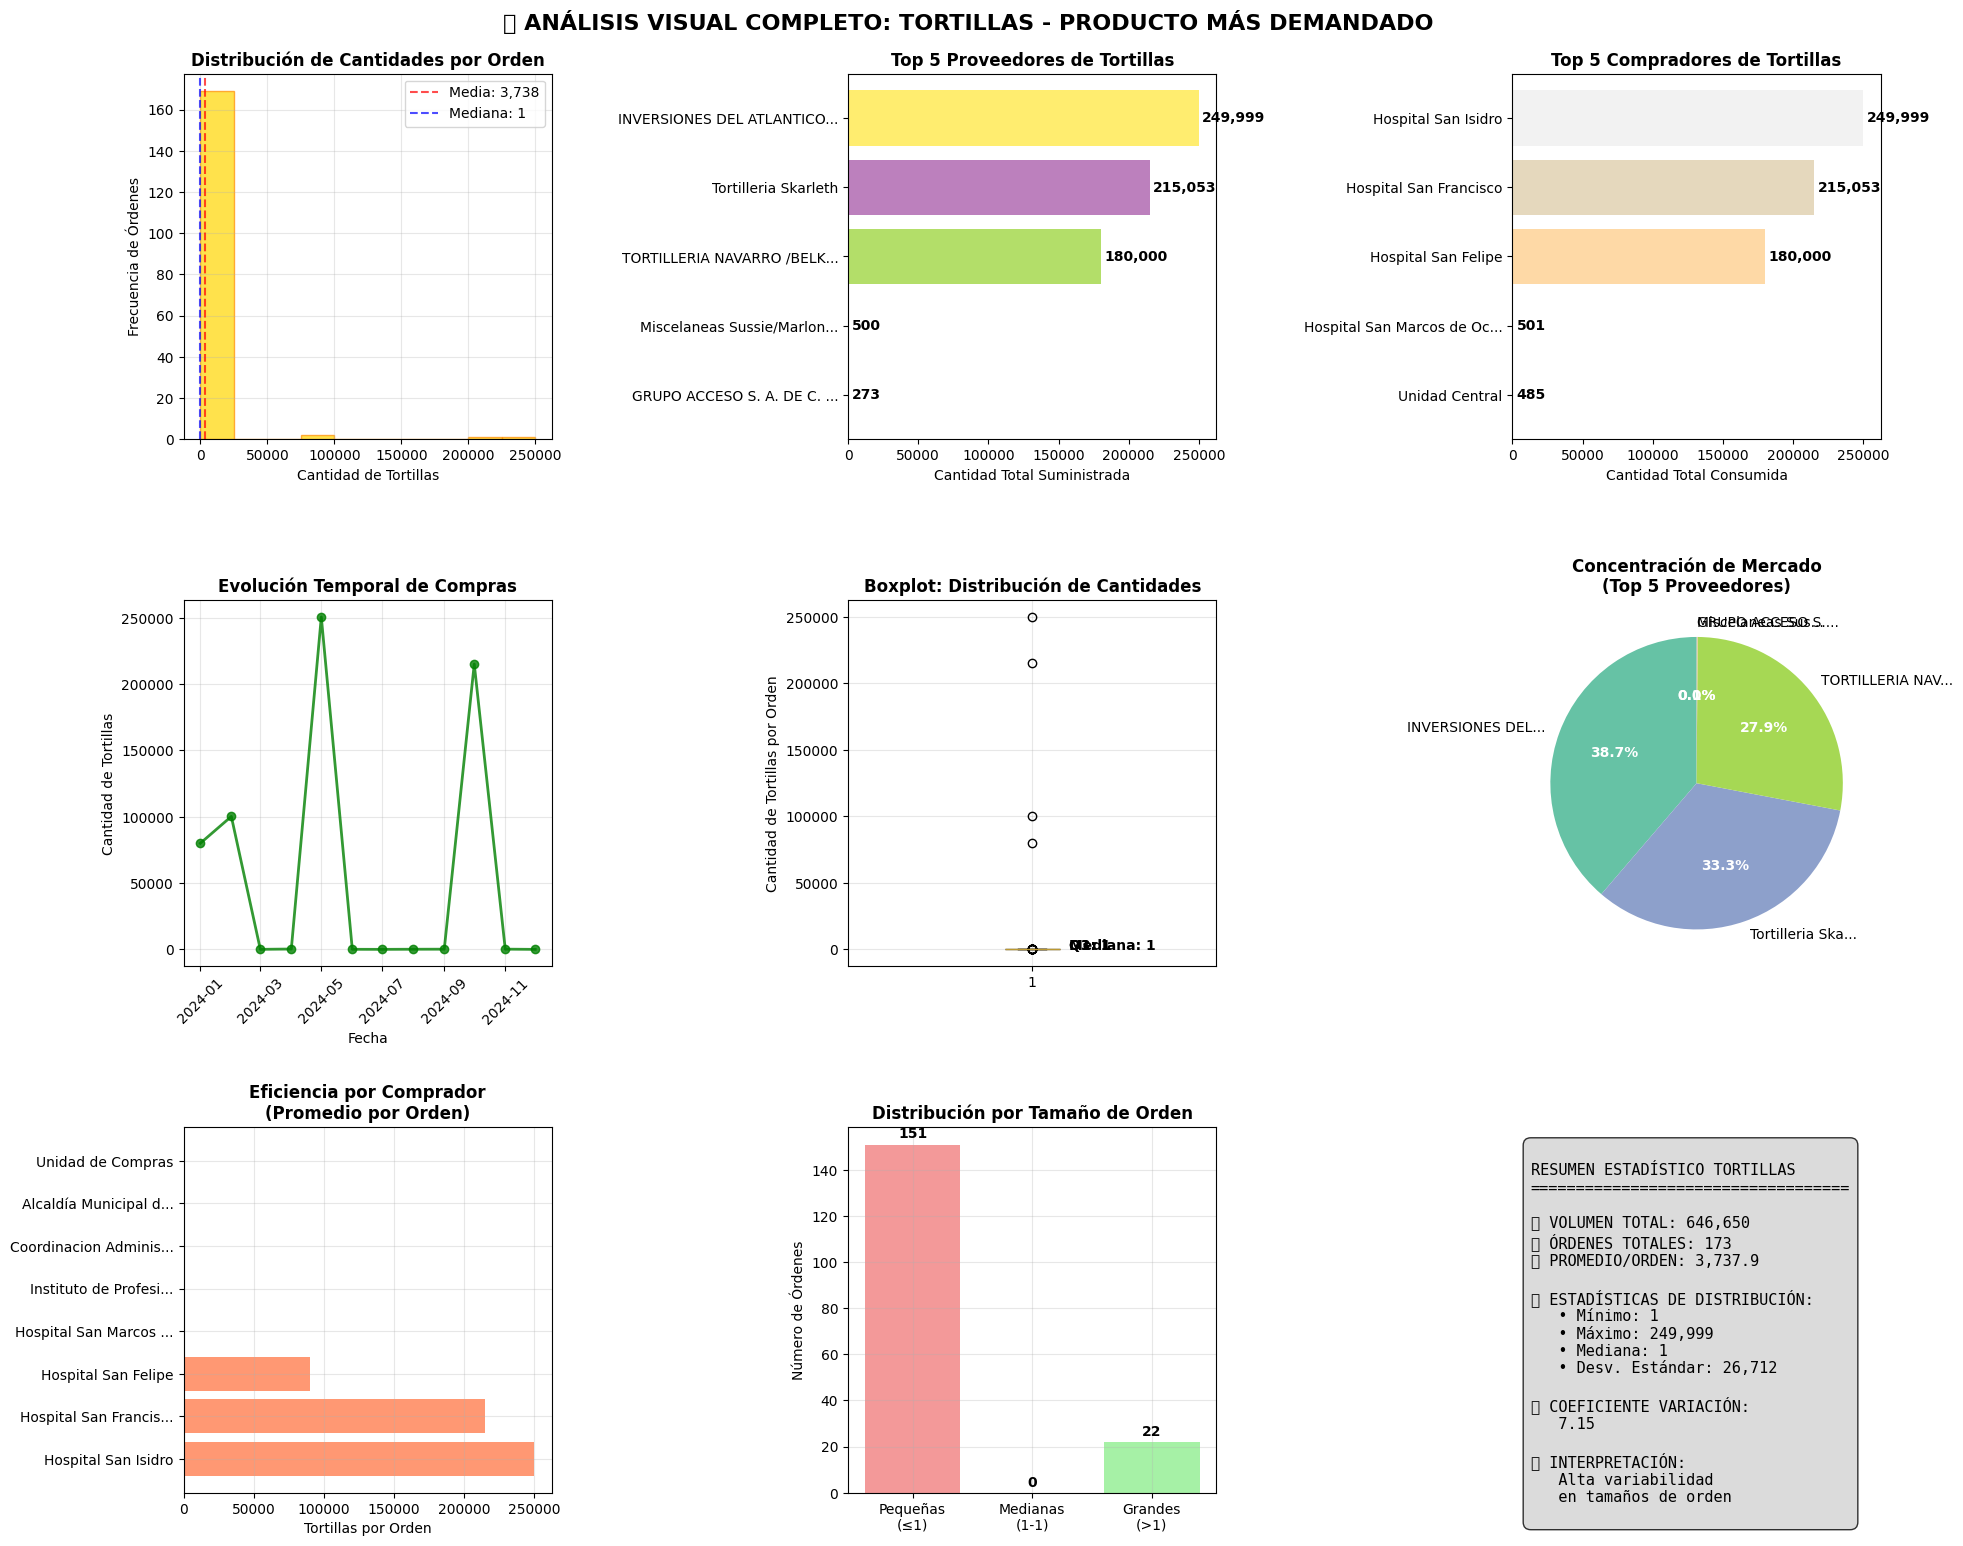

✅ Visualizaciones específicas de TORTILLAS generadas exitosamente
📊 Análisis visual de TORTILLAS completado


In [116]:
# VISUALIZACIONES ESPECÍFICAS PARA TORTILLAS
print("📊 Generando visualizaciones específicas para TORTILLAS...")

if 'tortillas_analysis' in globals() and len(tortillas_analysis['data']) > 0:
    tortillas_data = tortillas_analysis['data']
    
    # Configuración de la figura principal
    fig = plt.figure(figsize=(20, 16))
    
    # 1. DISTRIBUCIÓN DE CANTIDADES POR ORDEN
    plt.subplot(3, 3, 1)
    plt.hist(tortillas_data['quantityItem'], bins=min(10, len(tortillas_data)), 
             color='gold', alpha=0.7, edgecolor='darkorange')
    plt.title('Distribución de Cantidades por Orden', fontsize=12, fontweight='bold')
    plt.xlabel('Cantidad de Tortillas')
    plt.ylabel('Frecuencia de Órdenes')
    plt.grid(True, alpha=0.3)
    
    # Agregar líneas estadísticas
    mean_qty = tortillas_data['quantityItem'].mean()
    median_qty = tortillas_data['quantityItem'].median()
    plt.axvline(mean_qty, color='red', linestyle='--', alpha=0.7, label=f'Media: {mean_qty:,.0f}')
    plt.axvline(median_qty, color='blue', linestyle='--', alpha=0.7, label=f'Mediana: {median_qty:,.0f}')
    plt.legend(fontsize=10)
    
    # 2. TOP PROVEEDORES (si hay datos)
    if 'nameSupplier' in tortillas_data.columns:
        plt.subplot(3, 3, 2)
        top_suppliers = tortillas_data.groupby('nameSupplier')['quantityItem'].sum().sort_values(ascending=True).tail(5)
        
        if len(top_suppliers) > 0:
            colors = plt.cm.Set3(np.linspace(0, 1, len(top_suppliers)))
            bars = plt.barh(range(len(top_suppliers)), top_suppliers.values, color=colors)
            plt.yticks(range(len(top_suppliers)), 
                      [name[:25] + '...' if len(name) > 25 else name for name in top_suppliers.index])
            plt.title('Top 5 Proveedores de Tortillas', fontsize=12, fontweight='bold')
            plt.xlabel('Cantidad Total Suministrada')
            
            # Agregar etiquetas de valores
            for i, (bar, value) in enumerate(zip(bars, top_suppliers.values)):
                plt.text(value + max(top_suppliers.values) * 0.01, bar.get_y() + bar.get_height()/2,
                        f'{value:,.0f}', va='center', fontweight='bold', fontsize=10)
    
    # 3. TOP COMPRADORES (si hay datos)
    if 'nameUnidadBuyer' in tortillas_data.columns:
        plt.subplot(3, 3, 3)
        top_buyers = tortillas_data.groupby('nameUnidadBuyer')['quantityItem'].sum().sort_values(ascending=True).tail(5)
        
        if len(top_buyers) > 0:
            colors = plt.cm.Pastel1(np.linspace(0, 1, len(top_buyers)))
            bars = plt.barh(range(len(top_buyers)), top_buyers.values, color=colors)
            plt.yticks(range(len(top_buyers)), 
                      [name[:25] + '...' if len(name) > 25 else name for name in top_buyers.index])
            plt.title('Top 5 Compradores de Tortillas', fontsize=12, fontweight='bold')
            plt.xlabel('Cantidad Total Consumida')
            
            # Agregar etiquetas de valores
            for i, (bar, value) in enumerate(zip(bars, top_buyers.values)):
                plt.text(value + max(top_buyers.values) * 0.01, bar.get_y() + bar.get_height()/2,
                        f'{value:,.0f}', va='center', fontweight='bold', fontsize=10)
    
    # 4. ANÁLISIS TEMPORAL (si hay fechas)
    if 'startDateTender' in tortillas_data.columns:
        plt.subplot(3, 3, 4)
        # Convertir fechas si es necesario
        if tortillas_data['startDateTender'].dtype == 'object':
            tortillas_data['startDateTender'] = pd.to_datetime(tortillas_data['startDateTender'], errors='coerce')
        
        valid_dates = tortillas_data.dropna(subset=['startDateTender'])
        
        if len(valid_dates) > 0:
            # Agrupar por mes
            valid_dates['year_month'] = valid_dates['startDateTender'].dt.to_period('M')
            monthly_data = valid_dates.groupby('year_month')['quantityItem'].sum()
            
            if len(monthly_data) > 1:
                monthly_data.index = monthly_data.index.to_timestamp()
                plt.plot(monthly_data.index, monthly_data.values, marker='o', linewidth=2, 
                        markersize=6, color='green', alpha=0.8)
                plt.title('Evolución Temporal de Compras', fontsize=12, fontweight='bold')
                plt.xlabel('Fecha')
                plt.ylabel('Cantidad de Tortillas')
                plt.xticks(rotation=45)
                plt.grid(True, alpha=0.3)
            else:
                plt.text(0.5, 0.5, 'Datos temporales\ninsuficientes', 
                        transform=plt.gca().transAxes, ha='center', va='center')
                plt.title('Evolución Temporal', fontsize=12, fontweight='bold')
    
    # 5. BOXPLOT DE DISTRIBUCIÓN
    plt.subplot(3, 3, 5)
    box_plot = plt.boxplot(tortillas_data['quantityItem'], patch_artist=True, 
                          boxprops=dict(facecolor='lightblue', alpha=0.7))
    plt.title('Boxplot: Distribución de Cantidades', fontsize=12, fontweight='bold')
    plt.ylabel('Cantidad de Tortillas por Orden')
    plt.grid(True, alpha=0.3)
    
    # Agregar estadísticas al boxplot
    stats = tortillas_data['quantityItem'].describe()
    plt.text(1.1, stats['75%'], f"Q3: {stats['75%']:,.0f}", fontweight='bold')
    plt.text(1.1, stats['50%'], f"Mediana: {stats['50%']:,.0f}", fontweight='bold')
    plt.text(1.1, stats['25%'], f"Q1: {stats['25%']:,.0f}", fontweight='bold')
    
    # 6. CONCENTRACIÓN DE MERCADO
    plt.subplot(3, 3, 6)
    if 'nameSupplier' in tortillas_data.columns:
        supplier_shares = tortillas_data.groupby('nameSupplier')['quantityItem'].sum()
        supplier_shares = supplier_shares.sort_values(ascending=False)
        
        # Calcular participación de mercado
        total_market = supplier_shares.sum()
        market_shares = (supplier_shares / total_market * 100).head(5)
        
        if len(market_shares) > 0:
            colors = plt.cm.Set2(np.linspace(0, 1, len(market_shares)))
            wedges, texts, autotexts = plt.pie(market_shares.values, 
                                             labels=[f"{name[:15]}..." if len(name) > 15 else name 
                                                    for name in market_shares.index],
                                             autopct='%1.1f%%', colors=colors, startangle=90)
            plt.title('Concentración de Mercado\n(Top 5 Proveedores)', fontsize=12, fontweight='bold')
            
            # Mejorar legibilidad
            for autotext in autotexts:
                autotext.set_color('white')
                autotext.set_fontweight('bold')
    
    # 7. EFICIENCIA DE ÓRDENES
    plt.subplot(3, 3, 7)
    if 'nameUnidadBuyer' in tortillas_data.columns:
        buyer_efficiency = tortillas_data.groupby('nameUnidadBuyer').agg({
            'quantityItem': ['count', 'sum']
        }).round(0)
        buyer_efficiency.columns = ['num_orders', 'total_quantity']
        buyer_efficiency['avg_per_order'] = buyer_efficiency['total_quantity'] / buyer_efficiency['num_orders']
        buyer_efficiency = buyer_efficiency.sort_values('avg_per_order', ascending=False).head(8)
        
        if len(buyer_efficiency) > 0:
            plt.barh(range(len(buyer_efficiency)), buyer_efficiency['avg_per_order'], 
                    color='coral', alpha=0.8)
            plt.yticks(range(len(buyer_efficiency)), 
                      [name[:20] + '...' if len(name) > 20 else name for name in buyer_efficiency.index])
            plt.title('Eficiencia por Comprador\n(Promedio por Orden)', fontsize=12, fontweight='bold')
            plt.xlabel('Tortillas por Orden')
            plt.grid(True, alpha=0.3)
    
    # 8. CATEGORÍAS DE ÓRDENES
    plt.subplot(3, 3, 8)
    q25 = tortillas_data['quantityItem'].quantile(0.25)
    q75 = tortillas_data['quantityItem'].quantile(0.75)
    
    small_orders = len(tortillas_data[tortillas_data['quantityItem'] <= q25])
    medium_orders = len(tortillas_data[(tortillas_data['quantityItem'] > q25) & 
                                      (tortillas_data['quantityItem'] <= q75)])
    large_orders = len(tortillas_data[tortillas_data['quantityItem'] > q75])
    
    categories = ['Pequeñas\n(≤' + f'{q25:,.0f})', 
                 'Medianas\n(' + f'{q25:,.0f}-{q75:,.0f})', 
                 'Grandes\n(>' + f'{q75:,.0f})']
    values = [small_orders, medium_orders, large_orders]
    colors = ['lightcoral', 'gold', 'lightgreen']
    
    bars = plt.bar(categories, values, color=colors, alpha=0.8)
    plt.title('Distribución por Tamaño de Orden', fontsize=12, fontweight='bold')
    plt.ylabel('Número de Órdenes')
    plt.grid(True, alpha=0.3)
    
    # Agregar etiquetas de valores
    for bar, value in zip(bars, values):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(values) * 0.01,
                f'{value}', ha='center', va='bottom', fontweight='bold')
    
    # 9. RESUMEN ESTADÍSTICO
    plt.subplot(3, 3, 9)
    plt.axis('off')
    
    # Crear resumen estadístico visual
    stats_text = f"""
RESUMEN ESTADÍSTICO TORTILLAS
{'='*35}

📊 VOLUMEN TOTAL: {tortillas_analysis['total_quantity']:,.0f}
📦 ÓRDENES TOTALES: {tortillas_analysis['total_orders']:,}
📈 PROMEDIO/ORDEN: {tortillas_analysis['avg_per_order']:,.1f}

📉 ESTADÍSTICAS DE DISTRIBUCIÓN:
   • Mínimo: {tortillas_data['quantityItem'].min():,.0f}
   • Máximo: {tortillas_data['quantityItem'].max():,.0f}
   • Mediana: {tortillas_data['quantityItem'].median():,.0f}
   • Desv. Estándar: {tortillas_data['quantityItem'].std():,.0f}

🎯 COEFICIENTE VARIACIÓN: 
   {tortillas_data['quantityItem'].std() / tortillas_data['quantityItem'].mean():.2f}
   
💡 INTERPRETACIÓN:
   {"Alta variabilidad" if tortillas_data['quantityItem'].std() / tortillas_data['quantityItem'].mean() > 1 else "Moderada variabilidad" if tortillas_data['quantityItem'].std() / tortillas_data['quantityItem'].mean() > 0.5 else "Baja variabilidad"}
   en tamaños de orden
"""
    
    plt.text(0.05, 0.95, stats_text, transform=plt.gca().transAxes, 
             fontsize=11, verticalalignment='top', fontfamily='monospace',
             bbox=dict(boxstyle="round,pad=0.5", facecolor="lightgray", alpha=0.8))
    
    # Ajustar layout y mostrar
    plt.tight_layout(pad=3.0)
    plt.suptitle('🌮 ANÁLISIS VISUAL COMPLETO: TORTILLAS - PRODUCTO MÁS DEMANDADO', 
                 fontsize=16, fontweight='bold', y=0.98)
    plt.subplots_adjust(top=0.94)
    plt.show()
    
    print("✅ Visualizaciones específicas de TORTILLAS generadas exitosamente")
    
else:
    print("❌ No hay datos de TORTILLAS disponibles para visualizar")

print("📊 Análisis visual de TORTILLAS completado")

---
## 📦 **FASE 9: ANÁLISIS ESPECÍFICO POR DESCRIPCIÓN DE ÍTEMS** 
*Exploración integral de todos los productos del catálogo*

### 🔍 **Paso 9.1: Análisis Exploratorio de Descripciones de Ítems**

In [ ]:
# FASE 9: ANÁLISIS ESPECÍFICO POR DESCRIPCIÓN DE ÍTEMS
print("📦 ANÁLISIS ESPECÍFICO: DESCRIPCIÓN DE ÍTEMS")
print("="*65)

# Exploración inicial de la columna descriptionItem
if 'descriptionItem' in df.columns:
    print(f"✅ Columna 'descriptionItem' encontrada")
    
    # Información básica
    total_records = len(df)
    unique_items = df['descriptionItem'].nunique()
    null_descriptions = df['descriptionItem'].isnull().sum()
    valid_descriptions = total_records - null_descriptions
    
    print(f"\n📊 ESTADÍSTICAS GENERALES:")
    print(f"   • Total de registros: {total_records:,}")
    print(f"   • Descripciones únicas: {unique_items:,}")
    print(f"   • Descripciones válidas: {valid_descriptions:,} ({valid_descriptions/total_records*100:.1f}%)")
    print(f"   • Descripciones nulas: {null_descriptions:,} ({null_descriptions/total_records*100:.1f}%)")
    
    # Análisis de longitud de descripciones
    print(f"\n📏 ANÁLISIS DE LONGITUD DE DESCRIPCIONES:")
    valid_desc = df['descriptionItem'].dropna()
    
    if len(valid_desc) > 0:
        desc_lengths = valid_desc.str.len()
        
        print(f"   • Longitud mínima: {desc_lengths.min()} caracteres")
        print(f"   • Longitud máxima: {desc_lengths.max()} caracteres")
        print(f"   • Longitud promedio: {desc_lengths.mean():.1f} caracteres")
        print(f"   • Longitud mediana: {desc_lengths.median():.0f} caracteres")
        
        # Categorizar por longitud
        short_desc = len(desc_lengths[desc_lengths <= 20])  # Muy cortas
        medium_desc = len(desc_lengths[(desc_lengths > 20) & (desc_lengths <= 50)])  # Medias
        long_desc = len(desc_lengths[desc_lengths > 50])  # Largas
        
        print(f"\n   📈 Distribución por longitud:")
        print(f"      • Descripciones cortas (≤20 chars): {short_desc:,} ({short_desc/len(desc_lengths)*100:.1f}%)")
        print(f"      • Descripciones medias (21-50 chars): {medium_desc:,} ({medium_desc/len(desc_lengths)*100:.1f}%)")
        print(f"      • Descripciones largas (>50 chars): {long_desc:,} ({long_desc/len(desc_lengths)*100:.1f}%)")
    
    # Top productos más demandados
    print(f"\n🏆 TOP 15 PRODUCTOS MÁS DEMANDADOS:")
    print("=" * 75)
    
    item_analysis = df.groupby('descriptionItem').agg({
        'quantityItem': ['sum', 'count', 'mean'],
        'nameUnidadBuyer': 'nunique',  # Número de compradores únicos
        'nameSupplier': 'nunique'  # Número de proveedores únicos
    }).round(2)
    
    # Aplanar nombres de columnas
    item_analysis.columns = ['cantidad_total', 'num_ordenes', 'promedio_orden', 'num_compradores', 'num_proveedores']
    item_analysis = item_analysis.sort_values('cantidad_total', ascending=False)
    
    print(f"{'#':<3} {'Producto':<40} {'Cantidad':<12} {'Órdenes':<8} {'Compradores':<11} {'Proveedores':<11}")
    print("-" * 75)
    
    for i, (producto, row) in enumerate(item_analysis.head(15).iterrows(), 1):
        producto_short = str(producto)[:38] + ".." if len(str(producto)) > 40 else str(producto)
        print(f"{i:<3} {producto_short:<40} {row['cantidad_total']:>9,.0f} "
              f"{row['num_ordenes']:>6,.0f} {row['num_compradores']:>9,.0f} {row['num_proveedores']:>9,.0f}")
    
    # Análisis de categorías implícitas
    print(f"\n🏷️ ANÁLISIS DE CATEGORÍAS IMPLÍCITAS:")
    print("-" * 45)
    
    # Palabras clave comunes para categorización
    categories = {
        'ALIMENTOS': ['tortilla', 'arroz', 'frijol', 'aceite', 'comida', 'alimento', 'carne', 'leche', 'pan', 'azucar'],
        'MEDICAMENTOS': ['medicamento', 'medicina', 'farmaco', 'pastilla', 'jarabe', 'vacuna', 'suero'],
        'PAPELERÍA': ['papel', 'impresion', 'tinta', 'fotocopia', 'cuaderno', 'lapiz', 'boligrafo'],
        'COMBUSTIBLES': ['diesel', 'gasolina', 'combustible', 'gas'],
        'EQUIPOS MÉDICOS': ['equipo medico', 'instrumental', 'jeringa', 'aguja', 'estetoscopio'],
        'LIMPIEZA': ['detergente', 'jabon', 'cloro', 'limpieza', 'desinfectante'],
        'CONSTRUCCIÓN': ['cemento', 'arena', 'varilla', 'construccion', 'material'],
        'TECNOLOGÍA': ['computadora', 'impresora', 'software', 'hardware', 'electronico']
    }
    
    category_counts = {}
    
    for category, keywords in categories.items():
        # Buscar productos que contengan alguna palabra clave
        mask = valid_desc.str.lower().str.contains('|'.join(keywords), na=False, regex=True)
        category_products = df[df['descriptionItem'].str.lower().str.contains('|'.join(keywords), na=False, regex=True) & df['descriptionItem'].notna()]
        
        if len(category_products) > 0:
            category_quantity = category_products['quantityItem'].sum()
            category_orders = len(category_products)
            category_unique = category_products['descriptionItem'].nunique()
            
            category_counts[category] = {
                'productos_unicos': category_unique,
                'cantidad_total': category_quantity,
                'ordenes': category_orders
            }
            
            print(f"   {category}:")
            print(f"      • Productos únicos: {category_unique:,}")
            print(f"      • Cantidad total: {category_quantity:,.0f}")
            print(f"      • Número de órdenes: {category_orders:,}")
    
    # Análisis de diversidad de productos
    print(f"\n📊 ANÁLISIS DE DIVERSIDAD DE PRODUCTOS:")
    print("-" * 45)
    
    # Índice de concentración (HHI - Herfindahl-Hirschman Index)
    market_shares = item_analysis['cantidad_total'] / item_analysis['cantidad_total'].sum()
    hhi = (market_shares ** 2).sum()
    
    print(f"   • Índice de concentración (HHI): {hhi:.4f}")
    
    if hhi > 0.25:
        concentration_level = "ALTO - Mercado muy concentrado"
    elif hhi > 0.15:
        concentration_level = "MODERADO - Concentración moderada"
    else:
        concentration_level = "BAJO - Mercado diversificado"
        
    print(f"   • Nivel de concentración: {concentration_level}")
    
    # Top 5 y Top 10 concentración
    top5_share = item_analysis['cantidad_total'].head(5).sum() / item_analysis['cantidad_total'].sum() * 100
    top10_share = item_analysis['cantidad_total'].head(10).sum() / item_analysis['cantidad_total'].sum() * 100
    
    print(f"   • Top 5 productos: {top5_share:.1f}% del volumen total")
    print(f"   • Top 10 productos: {top10_share:.1f}% del volumen total")
    
    # Análisis de productos de baja rotación
    print(f"\n⚠️ ANÁLISIS DE PRODUCTOS DE BAJA ROTACIÓN:")
    print("-" * 50)
    
    low_volume_products = item_analysis[item_analysis['cantidad_total'] <= item_analysis['cantidad_total'].quantile(0.1)]
    single_order_products = item_analysis[item_analysis['num_ordenes'] == 1]
    
    print(f"   • Productos en bottom 10% de volumen: {len(low_volume_products):,}")
    print(f"   • Productos con una sola orden: {len(single_order_products):,}")
    print(f"   • % de productos de baja rotación: {len(low_volume_products)/len(item_analysis)*100:.1f}%")
    
    # Guardar análisis para uso posterior
    globals()['items_analysis'] = {
        'full_analysis': item_analysis,
        'category_counts': category_counts,
        'concentration_metrics': {
            'hhi': hhi,
            'top5_share': top5_share,
            'top10_share': top10_share
        },
        'diversity_metrics': {
            'total_unique': unique_items,
            'low_volume_count': len(low_volume_products),
            'single_order_count': len(single_order_products)
        }
    }
    
    print(f"\n💾 Análisis guardado en 'items_analysis' para uso posterior")
    
else:
    print("❌ Columna 'descriptionItem' no encontrada en el dataset")

print(f"\n📦 Análisis exploratorio de ítems completado")
print("="*65)

### 📊 **Paso 9.2: Visualizaciones del Catálogo de Productos**

In [ ]:
# VISUALIZACIONES DEL CATÁLOGO DE PRODUCTOS
print("📊 Generando visualizaciones del catálogo de productos...")

if 'items_analysis' in globals():
    item_data = items_analysis['full_analysis']
    
    # Crear figura principal con múltiples subplots
    fig = plt.figure(figsize=(20, 16))
    
    # 1. TOP 10 PRODUCTOS MÁS DEMANDADOS
    plt.subplot(3, 3, 1)
    top_10_items = item_data.head(10)
    colors = plt.cm.viridis(np.linspace(0, 1, len(top_10_items)))
    
    bars = plt.barh(range(len(top_10_items)), top_10_items['cantidad_total'], color=colors)
    plt.yticks(range(len(top_10_items)), 
               [item[:25] + '...' if len(item) > 25 else item for item in top_10_items.index])
    plt.xlabel('Cantidad Total')
    plt.title('Top 10 Productos Más Demandados', fontsize=12, fontweight='bold')
    plt.grid(axis='x', alpha=0.3)
    
    # Agregar etiquetas de valores
    for i, (bar, value) in enumerate(zip(bars, top_10_items['cantidad_total'])):
        plt.text(value + max(top_10_items['cantidad_total']) * 0.01, 
                bar.get_y() + bar.get_height()/2, f'{value:,.0f}',
                va='center', fontweight='bold', fontsize=9)
    
    # 2. DISTRIBUCIÓN DE LONGITUD DE DESCRIPCIONES
    plt.subplot(3, 3, 2)
    if 'descriptionItem' in df.columns:
        desc_lengths = df['descriptionItem'].dropna().str.len()
        
        plt.hist(desc_lengths, bins=20, color='skyblue', alpha=0.7, edgecolor='navy')
        plt.axvline(desc_lengths.mean(), color='red', linestyle='--', 
                   label=f'Media: {desc_lengths.mean():.1f}')
        plt.axvline(desc_lengths.median(), color='green', linestyle='--', 
                   label=f'Mediana: {desc_lengths.median():.1f}')
        plt.xlabel('Longitud de Descripción (caracteres)')
        plt.ylabel('Frecuencia')
        plt.title('Distribución de Longitud de Descripciones', fontsize=12, fontweight='bold')
        plt.legend()
        plt.grid(True, alpha=0.3)
    
    # 3. CONCENTRACIÓN DEL MERCADO (CURVA DE PARETO)
    plt.subplot(3, 3, 3)
    # Calcular porcentaje acumulado
    sorted_items = item_data['cantidad_total'].sort_values(ascending=False)
    cumulative_pct = (sorted_items.cumsum() / sorted_items.sum() * 100)
    
    plt.plot(range(1, min(51, len(cumulative_pct)+1)), cumulative_pct.head(50), 
            marker='o', markersize=4, linewidth=2, color='purple')
    plt.axhline(y=80, color='red', linestyle='--', alpha=0.7, label='Regla 80/20')
    plt.xlabel('Número de Productos (Ranking)')
    plt.ylabel('% Acumulado del Volumen Total')
    plt.title('Curva de Concentración (Pareto)', fontsize=12, fontweight='bold')
    plt.grid(True, alpha=0.3)
    plt.legend()
    
    # 4. ANÁLISIS POR CATEGORÍAS (si hay datos)
    plt.subplot(3, 3, 4)
    if 'category_counts' in items_analysis and items_analysis['category_counts']:
        categories = list(items_analysis['category_counts'].keys())
        quantities = [items_analysis['category_counts'][cat]['cantidad_total'] for cat in categories]
        
        colors = plt.cm.Set3(np.linspace(0, 1, len(categories)))
        wedges, texts, autotexts = plt.pie(quantities, labels=categories, autopct='%1.1f%%', 
                                          colors=colors, startangle=90)
        plt.title('Distribución por Categorías\n(Volumen Total)', fontsize=12, fontweight='bold')
        
        # Mejorar legibilidad
        for autotext in autotexts:
            autotext.set_color('white')
            autotext.set_fontweight('bold')
            autotext.set_fontsize(9)
    else:
        plt.text(0.5, 0.5, 'Datos de\nCategorías\nNo Disponibles', 
                ha='center', va='center', transform=plt.gca().transAxes)
        plt.title('Distribución por Categorías', fontsize=12, fontweight='bold')
    
    # 5. DIVERSIDAD DE PROVEEDORES POR PRODUCTO
    plt.subplot(3, 3, 5)
    supplier_diversity = item_data.head(15)['num_proveedores']
    
    bars = plt.bar(range(len(supplier_diversity)), supplier_diversity.values, 
                  color='coral', alpha=0.8)
    plt.xticks(range(len(supplier_diversity)), 
               [item[:15] + '...' if len(item) > 15 else item for item in supplier_diversity.index], 
               rotation=45, ha='right')
    plt.ylabel('Número de Proveedores')
    plt.title('Diversidad de Proveedores\n(Top 15 Productos)', fontsize=12, fontweight='bold')
    plt.grid(axis='y', alpha=0.3)
    
    # Agregar etiquetas de valores
    for bar, value in zip(bars, supplier_diversity.values):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
                f'{value}', ha='center', va='bottom', fontweight='bold')
    
    # 6. DISTRIBUCIÓN DE ÓRDENES POR PRODUCTO
    plt.subplot(3, 3, 6)
    orders_distribution = item_data['num_ordenes']
    
    plt.hist(orders_distribution, bins=20, color='lightgreen', alpha=0.7, edgecolor='darkgreen')
    plt.axvline(orders_distribution.mean(), color='red', linestyle='--', 
               label=f'Media: {orders_distribution.mean():.1f}')
    plt.axvline(orders_distribution.median(), color='blue', linestyle='--', 
               label=f'Mediana: {orders_distribution.median():.1f}')
    plt.xlabel('Número de Órdenes por Producto')
    plt.ylabel('Frecuencia')
    plt.title('Distribución de Órdenes por Producto', fontsize=12, fontweight='bold')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # 7. ANÁLISIS DE EFICIENCIA (Cantidad promedio por orden)
    plt.subplot(3, 3, 7)
    top_efficiency = item_data.head(10)['promedio_orden'].sort_values(ascending=True)
    
    colors = plt.cm.plasma(np.linspace(0, 1, len(top_efficiency)))
    bars = plt.barh(range(len(top_efficiency)), top_efficiency.values, color=colors)
    plt.yticks(range(len(top_efficiency)), 
               [item[:20] + '...' if len(item) > 20 else item for item in top_efficiency.index])
    plt.xlabel('Cantidad Promedio por Orden')
    plt.title('Eficiencia de Órdenes\n(Top 10 Productos)', fontsize=12, fontweight='bold')
    plt.grid(axis='x', alpha=0.3)
    
    # 8. PRODUCTOS DE ALTA VS BAJA ROTACIÓN
    plt.subplot(3, 3, 8)
    
    # Clasificar productos por rotación
    q75 = item_data['cantidad_total'].quantile(0.75)
    q25 = item_data['cantidad_total'].quantile(0.25)
    
    alta_rotacion = len(item_data[item_data['cantidad_total'] > q75])
    media_rotacion = len(item_data[(item_data['cantidad_total'] >= q25) & 
                                  (item_data['cantidad_total'] <= q75)])
    baja_rotacion = len(item_data[item_data['cantidad_total'] < q25])
    
    rotation_categories = ['Alta Rotación\n(>Q3)', 'Media Rotación\n(Q1-Q3)', 'Baja Rotación\n(<Q1)']
    rotation_values = [alta_rotacion, media_rotacion, baja_rotacion]
    colors = ['green', 'orange', 'red']
    
    bars = plt.bar(rotation_categories, rotation_values, color=colors, alpha=0.7)
    plt.ylabel('Número de Productos')
    plt.title('Clasificación por Rotación', fontsize=12, fontweight='bold')
    plt.grid(axis='y', alpha=0.3)
    
    # Agregar etiquetas de valores y porcentajes
    total_products = sum(rotation_values)
    for bar, value in zip(bars, rotation_values):
        percentage = value / total_products * 100
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + total_products * 0.01,
                f'{value}\n({percentage:.1f}%)', ha='center', va='bottom', 
                fontweight='bold', fontsize=10)
    
    # 9. RESUMEN ESTADÍSTICO DEL CATÁLOGO
    plt.subplot(3, 3, 9)
    plt.axis('off')
    
    # Crear resumen estadístico
    total_products = len(item_data)
    total_volume = item_data['cantidad_total'].sum()
    avg_volume_per_product = item_data['cantidad_total'].mean()
    hhi = items_analysis['concentration_metrics']['hhi']
    
    summary_text = f"""
RESUMEN CATÁLOGO DE PRODUCTOS
{'='*38}

📦 PRODUCTOS ÚNICOS: {total_products:,}
📊 VOLUMEN TOTAL: {total_volume:,.0f}
📈 PROMEDIO/PRODUCTO: {avg_volume_per_product:,.0f}

🎯 CONCENTRACIÓN (HHI): {hhi:.4f}
📊 TOP 5: {items_analysis['concentration_metrics']['top5_share']:.1f}% del volumen
📊 TOP 10: {items_analysis['concentration_metrics']['top10_share']:.1f}% del volumen

🔄 ROTACIÓN:
   • Alta: {alta_rotacion:,} productos
   • Media: {media_rotacion:,} productos  
   • Baja: {baja_rotacion:,} productos

💡 DIVERSIDAD:
   {"Alto" if hhi < 0.15 else "Moderado" if hhi < 0.25 else "Bajo"} nivel de diversificación
   {"Catálogo equilibrado" if hhi < 0.15 else "Concentración moderada" if hhi < 0.25 else "Catálogo concentrado"}
"""
    
    plt.text(0.05, 0.95, summary_text, transform=plt.gca().transAxes, 
             fontsize=11, verticalalignment='top', fontfamily='monospace',
             bbox=dict(boxstyle="round,pad=0.5", facecolor="lightblue", alpha=0.8))
    
    # Ajustar layout y mostrar
    plt.tight_layout(pad=3.0)
    plt.suptitle('📦 ANÁLISIS VISUAL COMPLETO: CATÁLOGO DE PRODUCTOS', 
                 fontsize=16, fontweight='bold', y=0.98)
    plt.subplots_adjust(top=0.94)
    plt.show()
    
    print("✅ Visualizaciones del catálogo de productos generadas exitosamente")
    
else:
    print("❌ No hay datos de análisis de ítems disponibles para visualizar")

print("📊 Análisis visual del catálogo completado")

### 🔤 **Paso 9.3: Análisis de Texto Avanzado de Descripciones**

In [ ]:
# ANÁLISIS DE TEXTO AVANZADO DE DESCRIPCIONES
print("🔤 ANÁLISIS DE TEXTO AVANZADO: DESCRIPCIONES DE PRODUCTOS")
print("="*70)

if 'descriptionItem' in df.columns:
    import re
    from collections import Counter
    
    # Obtener descripciones válidas
    valid_descriptions = df['descriptionItem'].dropna()
    
    print(f"📝 Analizando {len(valid_descriptions):,} descripciones válidas...")
    
    # 1. ANÁLISIS DE PALABRAS MÁS FRECUENTES
    print(f"\n🔍 ANÁLISIS DE PALABRAS MÁS FRECUENTES:")
    print("-" * 45)
    
    # Limpiar texto y extraer palabras
    all_text = ' '.join(valid_descriptions.str.lower())
    
    # Remover caracteres especiales y dividir en palabras
    words = re.findall(r'\b[a-záéíóúüñ]+\b', all_text)
    
    # Filtrar palabras muy cortas (menos de 3 caracteres) y stopwords básicas
    stopwords = ['de', 'la', 'el', 'en', 'y', 'a', 'o', 'un', 'es', 'se', 'no', 'te', 'lo', 'le', 'da', 
                'su', 'por', 'son', 'con', 'del', 'las', 'al', 'una', 'sus', 'ser', 'para', 'muy']
    
    filtered_words = [word for word in words if len(word) >= 3 and word not in stopwords]
    
    # Contar frecuencias
    word_freq = Counter(filtered_words)
    top_words = word_freq.most_common(20)
    
    print("   TOP 20 PALABRAS MÁS FRECUENTES:")
    print(f"   {'Palabra':<20} {'Frecuencia':<10} {'% del total':<12}")
    print("   " + "-" * 42)
    
    total_words = len(filtered_words)
    for word, freq in top_words:
        percentage = (freq / total_words) * 100
        print(f"   {word:<20} {freq:<10,} {percentage:<12.2f}%")
    
    # 2. ANÁLISIS DE PATRONES COMUNES
    print(f"\n🔍 ANÁLISIS DE PATRONES COMUNES:")
    print("-" * 40)
    
    # Buscar patrones específicos
    patterns = {
        'NÚMEROS': r'\d+',
        'UNIDADES': r'\b(kg|gr|ml|lt|litro|kilo|gramo|unidad|pza|pieza)\b',
        'MARCAS': r'\b[A-Z][a-z]*[A-Z][a-z]*\b',  # Palabras con mayúsculas intercaladas
        'CÓDIGOS': r'\b[A-Z0-9]{3,}\b'  # Códigos alfanuméricos
    }
    
    pattern_counts = {}
    
    for pattern_name, pattern in patterns.items():
        matches = []
        for desc in valid_descriptions:
            found = re.findall(pattern, str(desc).upper())
            matches.extend(found)
        
        unique_matches = len(set(matches))
        total_matches = len(matches)
        
        pattern_counts[pattern_name] = {
            'total': total_matches,
            'unique': unique_matches
        }
        
        print(f"   {pattern_name}:")
        print(f"      • Total encontrados: {total_matches:,}")
        print(f"      • Únicos: {unique_matches:,}")
    
    # 3. ANÁLISIS DE CALIDAD DE DESCRIPCIONES
    print(f"\n📊 ANÁLISIS DE CALIDAD DE DESCRIPCIONES:")
    print("-" * 50)
    
    quality_metrics = {
        'muy_cortas': len(valid_descriptions[valid_descriptions.str.len() < 10]),
        'con_numeros': len(valid_descriptions[valid_descriptions.str.contains(r'\d', regex=True)]),
        'con_mayusculas': len(valid_descriptions[valid_descriptions.str.contains(r'[A-Z]', regex=True)]),
        'con_espacios_extra': len(valid_descriptions[valid_descriptions.str.contains(r'\s{2,}', regex=True)]),
        'con_caracteres_especiales': len(valid_descriptions[valid_descriptions.str.contains(r'[^\w\s]', regex=True)])
    }
    
    total_desc = len(valid_descriptions)
    
    print("   MÉTRICAS DE CALIDAD:")
    print(f"      • Descripciones muy cortas (<10 chars): {quality_metrics['muy_cortas']:,} ({quality_metrics['muy_cortas']/total_desc*100:.1f}%)")
    print(f"      • Con números: {quality_metrics['con_numeros']:,} ({quality_metrics['con_numeros']/total_desc*100:.1f}%)")
    print(f"      • Con mayúsculas: {quality_metrics['con_mayusculas']:,} ({quality_metrics['con_mayusculas']/total_desc*100:.1f}%)")
    print(f"      • Con espacios extra: {quality_metrics['con_espacios_extra']:,} ({quality_metrics['con_espacios_extra']/total_desc*100:.1f}%)")
    print(f"      • Con caracteres especiales: {quality_metrics['con_caracteres_especiales']:,} ({quality_metrics['con_caracteres_especiales']/total_desc*100:.1f}%)")
    
    # Calcular score de calidad general
    quality_issues = (quality_metrics['muy_cortas'] + quality_metrics['con_espacios_extra'])
    quality_score = ((total_desc - quality_issues) / total_desc) * 100
    
    print(f"\n   📊 SCORE DE CALIDAD GENERAL: {quality_score:.1f}%")
    
    if quality_score >= 90:
        quality_status = "EXCELENTE - Descripciones muy bien estructuradas"
    elif quality_score >= 75:
        quality_status = "BUENA - Descripciones generalmente bien estructuradas"
    elif quality_score >= 60:
        quality_status = "REGULAR - Algunas mejoras necesarias"
    else:
        quality_status = "DEFICIENTE - Requiere limpieza significativa"
    
    print(f"   📈 Estado: {quality_status}")
    
    # 4. DETECCIÓN DE DUPLICADOS Y SIMILARES
    print(f"\n🔍 ANÁLISIS DE DUPLICADOS Y SIMILARES:")
    print("-" * 45)
    
    # Duplicados exactos
    duplicates = valid_descriptions.duplicated().sum()
    unique_descriptions = valid_descriptions.nunique()
    
    print(f"   • Descripciones duplicadas exactas: {duplicates:,}")
    print(f"   • Descripciones únicas: {unique_descriptions:,}")
    print(f"   • Ratio de duplicación: {(duplicates/(duplicates+unique_descriptions))*100:.1f}%")
    
    # Buscar descripciones muy similares (mismas palabras clave)
    description_words = {}
    for idx, desc in valid_descriptions.items():
        words_in_desc = set(re.findall(r'\b[a-záéíóúüñ]+\b', str(desc).lower()))
        words_in_desc = {w for w in words_in_desc if len(w) >= 3 and w not in stopwords}
        
        if len(words_in_desc) > 0:
            key = tuple(sorted(words_in_desc))
            if key in description_words:
                description_words[key] += 1
            else:
                description_words[key] = 1
    
    similar_groups = {k: v for k, v in description_words.items() if v > 1}
    
    print(f"   • Grupos de descripciones similares: {len(similar_groups):,}")
    print(f"   • Descripciones en grupos similares: {sum(similar_groups.values()):,}")
    
    # 5. ANÁLISIS DE CONSISTENCIA DE FORMATO
    print(f"\n📋 ANÁLISIS DE CONSISTENCIA DE FORMATO:")
    print("-" * 45)
    
    format_analysis = {
        'solo_mayusculas': len(valid_descriptions[valid_descriptions.str.isupper()]),
        'solo_minusculas': len(valid_descriptions[valid_descriptions.str.islower()]),
        'mixto': len(valid_descriptions) - len(valid_descriptions[valid_descriptions.str.isupper()]) - len(valid_descriptions[valid_descriptions.str.islower()]),
        'con_numeros_al_final': len(valid_descriptions[valid_descriptions.str.match(r'.*\d+$')]),
        'con_numeros_al_inicio': len(valid_descriptions[valid_descriptions.str.match(r'^\d+.*')])
    }
    
    print("   PATRONES DE FORMATO:")
    for format_type, count in format_analysis.items():
        percentage = (count / total_desc) * 100
        format_name = format_type.replace('_', ' ').title()
        print(f"      • {format_name}: {count:,} ({percentage:.1f}%)")
    
    # Identificar el patrón más común
    most_common_format = max(format_analysis, key=format_analysis.get)
    print(f"\n   📊 Patrón más común: {most_common_format.replace('_', ' ').title()}")
    
    # Guardar análisis de texto
    globals()['text_analysis'] = {
        'word_frequencies': top_words,
        'pattern_counts': pattern_counts,
        'quality_metrics': quality_metrics,
        'quality_score': quality_score,
        'format_analysis': format_analysis,
        'duplicates_info': {
            'exact_duplicates': duplicates,
            'unique_count': unique_descriptions,
            'similar_groups': len(similar_groups)
        }
    }
    
    print(f"\n💾 Análisis de texto guardado en 'text_analysis'")
    
else:
    print("❌ Columna 'descriptionItem' no disponible para análisis de texto")

print(f"\n🔤 Análisis de texto avanzado completado")
print("="*70)

### 🎯 **Paso 9.4: Estrategias de Optimización del Catálogo**

In [ ]:
# ESTRATEGIAS DE OPTIMIZACIÓN DEL CATÁLOGO
print("🎯 ESTRATEGIAS DE OPTIMIZACIÓN DEL CATÁLOGO DE PRODUCTOS")
print("="*75)

if 'items_analysis' in globals() and 'text_analysis' in globals():
    
    # ANÁLISIS INTEGRAL Y RECOMENDACIONES
    print("🔍 DIAGNÓSTICO INTEGRAL DEL CATÁLOGO:")
    print("-" * 50)
    
    item_data = items_analysis['full_analysis']
    metrics = items_analysis['concentration_metrics']
    diversity = items_analysis['diversity_metrics']
    text_data = text_analysis
    
    # Diagnóstico por área
    diagnoses = []
    
    # 1. Concentración del mercado
    hhi = metrics['hhi']
    if hhi > 0.25:
        diagnoses.append({
            'area': 'CONCENTRACIÓN',
            'status': 'CRÍTICO',
            'issue': f'Mercado muy concentrado (HHI: {hhi:.3f})',
            'impact': 'Alto riesgo de dependencia en pocos productos'
        })
    elif hhi > 0.15:
        diagnoses.append({
            'area': 'CONCENTRACIÓN',
            'status': 'MODERADO',
            'issue': f'Concentración moderada (HHI: {hhi:.3f})',
            'impact': 'Riesgo medio de dependencia'
        })
    
    # 2. Calidad de descripciones
    quality_score = text_data['quality_score']
    if quality_score < 75:
        diagnoses.append({
            'area': 'CALIDAD DE DATOS',
            'status': 'CRÍTICO' if quality_score < 60 else 'MODERADO',
            'issue': f'Calidad de descripciones baja ({quality_score:.1f}%)',
            'impact': 'Dificultad en búsquedas y categorización'
        })
    
    # 3. Productos de baja rotación
    low_rotation_pct = (diversity['low_volume_count'] / diversity['total_unique']) * 100
    if low_rotation_pct > 40:
        diagnoses.append({
            'area': 'ROTACIÓN',
            'status': 'CRÍTICO' if low_rotation_pct > 60 else 'MODERADO',
            'issue': f'Alto porcentaje de productos de baja rotación ({low_rotation_pct:.1f}%)',
            'impact': 'Ineficiencia en gestión de inventario'
        })
    
    # 4. Duplicados y similares
    duplicate_issues = text_data['duplicates_info']
    if duplicate_issues['similar_groups'] > diversity['total_unique'] * 0.1:
        diagnoses.append({
            'area': 'DUPLICACIÓN',
            'status': 'MODERADO',
            'issue': f'Muchos productos similares ({duplicate_issues["similar_groups"]} grupos)',
            'impact': 'Confusión en selección y redundancia'
        })
    
    # Mostrar diagnósticos
    print("📊 DIAGNÓSTICOS IDENTIFICADOS:")
    for diag in diagnoses:
        print(f"\n   🔸 {diag['area']} - Estado: {diag['status']}")
        print(f"      Problema: {diag['issue']}")
        print(f"      Impacto: {diag['impact']}")
    
    if not diagnoses:
        print("   ✅ No se identificaron problemas críticos en el catálogo")
    
    # RECOMENDACIONES ESTRATÉGICAS
    print(f"\n🎯 RECOMENDACIONES ESTRATÉGICAS:")
    print("="*50)
    
    recommendations = []
    
    # Recomendaciones basadas en concentración
    if hhi > 0.20:
        recommendations.append({
            'priority': 'ALTA',
            'category': 'DIVERSIFICACIÓN',
            'action': 'Ampliar catálogo de productos alternativos',
            'description': f'Reducir dependencia del top 10 que representa {metrics["top10_share"]:.1f}% del volumen',
            'expected_benefit': 'Reducir riesgo de desabastecimiento',
            'timeline': '6-12 meses',
            'kpi': 'Reducir HHI por debajo de 0.15'
        })
    
    # Recomendaciones por calidad de datos
    if quality_score < 80:
        recommendations.append({
            'priority': 'ALTA' if quality_score < 60 else 'MEDIA',
            'category': 'CALIDAD DE DATOS',
            'action': 'Implementar programa de limpieza de descripciones',
            'description': 'Estandarizar formato y completitud de descripciones',
            'expected_benefit': 'Mejorar búsquedas y análisis de demanda',
            'timeline': '3-6 meses',
            'kpi': f'Aumentar calidad de descripciones a 90%+'
        })
    
    # Recomendaciones por productos de baja rotación
    if low_rotation_pct > 30:
        recommendations.append({
            'priority': 'MEDIA',
            'category': 'OPTIMIZACIÓN DE CATÁLOGO',
            'action': 'Revisar productos de baja rotación',
            'description': f'Evaluar {diversity["low_volume_count"]} productos con poca demanda',
            'expected_benefit': 'Simplificar gestión y reducir costos administrativos',
            'timeline': '3-4 meses',
            'kpi': 'Reducir productos de baja rotación en 25%'
        })
    
    # Recomendaciones por duplicados
    if duplicate_issues['similar_groups'] > 50:
        recommendations.append({
            'priority': 'MEDIA',
            'category': 'CONSOLIDACIÓN',
            'action': 'Consolidar productos similares',
            'description': f'Unificar {duplicate_issues["similar_groups"]} grupos de productos similares',
            'expected_benefit': 'Simplificar proceso de compras',
            'timeline': '4-6 meses',
            'kpi': 'Reducir grupos similares en 50%'
        })
    
    # Recomendaciones proactivas
    recommendations.append({
        'priority': 'BAJA',
        'category': 'INNOVACIÓN',
        'action': 'Implementar sistema de análisis predictivo',
        'description': 'Predecir demanda y identificar productos emergentes',
        'expected_benefit': 'Anticipar necesidades y optimizar compras',
        'timeline': '9-12 meses',
        'kpi': 'Precisión de predicción >80%'
    })
    
    # Mostrar recomendaciones
    print("📋 PLAN DE ACCIÓN RECOMENDADO:")
    for i, rec in enumerate(sorted(recommendations, 
                                 key=lambda x: {'ALTA': 1, 'MEDIA': 2, 'BAJA': 3}[x['priority']]), 1):
        
        print(f"\n{i}. {rec['category']} - Prioridad: {rec['priority']}")
        print(f"   🎯 Acción: {rec['action']}")
        print(f"   📝 Descripción: {rec['description']}")
        print(f"   💰 Beneficio esperado: {rec['expected_benefit']}")
        print(f"   ⏱️ Cronograma: {rec['timeline']}")
        print(f"   📊 KPI objetivo: {rec['kpi']}")
    
    # MÉTRICAS DE SEGUIMIENTO
    print(f"\n📊 DASHBOARD DE MÉTRICAS CLAVE:")
    print("="*45)
    
    current_metrics = {
        'productos_unicos': diversity['total_unique'],
        'concentracion_hhi': hhi,
        'top_10_share': metrics['top10_share'],
        'calidad_descripciones': quality_score,
        'productos_baja_rotacion': diversity['low_volume_count'],
        'grupos_similares': duplicate_issues['similar_groups']
    }
    
    # Objetivos recomendados
    target_metrics = {
        'productos_unicos': diversity['total_unique'],  # Mantener o aumentar
        'concentracion_hhi': min(0.15, hhi * 0.8),  # Reducir concentración
        'top_10_share': min(70, metrics['top10_share'] * 0.9),  # Reducir dependencia top 10
        'calidad_descripciones': max(90, quality_score * 1.1),  # Mejorar calidad
        'productos_baja_rotacion': diversity['low_volume_count'] * 0.7,  # Reducir 30%
        'grupos_similares': max(10, duplicate_issues['similar_groups'] * 0.5)  # Reducir 50%
    }
    
    print("📈 MÉTRICAS ACTUALES VS OBJETIVOS:")
    print(f"{'Métrica':<25} {'Actual':<15} {'Objetivo':<15} {'Cambio':<15}")
    print("-" * 70)
    
    for metric, current in current_metrics.items():
        target = target_metrics[metric]
        change = ((target - current) / current * 100) if current > 0 else 0
        change_symbol = "📈" if change > 0 else "📉" if change < 0 else "➡️"
        
        metric_name = metric.replace('_', ' ').title()
        
        if isinstance(current, float):
            print(f"{metric_name:<25} {current:<15.2f} {target:<15.2f} {change:>+6.1f}% {change_symbol}")
        else:
            print(f"{metric_name:<25} {current:<15,} {target:<15,.0f} {change:>+6.1f}% {change_symbol}")
    
    # CRONOGRAMA DE IMPLEMENTACIÓN
    print(f"\n📅 CRONOGRAMA DE IMPLEMENTACIÓN:")
    print("-" * 40)
    
    phases = [
        ("Fase 1 (Meses 1-3)", ["Limpieza de descripciones", "Identificación de duplicados"]),
        ("Fase 2 (Meses 4-6)", ["Consolidación de similares", "Revisión baja rotación"]),
        ("Fase 3 (Meses 7-9)", ["Diversificación catálogo", "Implementación métricas"]),
        ("Fase 4 (Meses 10-12)", ["Sistema predictivo", "Optimización continua"])
    ]
    
    for phase, actions in phases:
        print(f"\n   {phase}:")
        for action in actions:
            print(f"      • {action}")
    
    print(f"\n🎯 IMPACTO ESPERADO AL FINALIZAR:")
    print("-" * 35)
    print("   • Reducción de riesgo de concentración")
    print("   • Mejora en eficiencia de búsquedas")
    print("   • Optimización de gestión de inventario")
    print("   • Mayor transparencia en proceso de compras")
    
else:
    print("❌ Datos de análisis no disponibles para generar recomendaciones")

print(f"\n🎯 Análisis estratégico del catálogo completado")
print("="*75)